# Data Understanding

Data yang akan dipakai sebagai forcasting:
<br>
Main Data:
1. Data harga pangan (daily) 2021 - 2024
2. Inflasi MtM (Month to Month) (monthly)
3. Inflasi YoY (Year on Year) (monthly)
4. Inflasi YoD (Year on Date) (monthly)

Support Data:
for gain insight purposes only
1. UMR Jawa Barat (yearly)
2. Indikator Kesejahteraan Rakya Jawa Barat (yearly)
3. Biaya Hidup Jawa Barat (Berdasarkan SBH 2022)

## Library and Path Definition


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
from google.colab import drive
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_folder_path = '/content/drive/My Drive/1. Tampung Bay 2/Tugas BIG DATA/Tugas Akhir/Data'
model_folder_path = main_folder_path + '/modelling'

# Data Pre-Processing and Transforming

## Import Data

### Harga Pangan 2021 - 2024

In [ ]:
path_data_pangan = main_folder_path + '/analysis/harga_pangan_clean.xlsx'

In [ ]:
df_harga_pangan = pd.read_excel(path_data_pangan)

In [ ]:
df_harga_pangan.columns

Index(['Tanggal', 'Hari', 'Bulan', 'Tahun', 'Beras Premium', 'Beras Medium',
       'Daging Sapi Murni', 'Daging Ayam Ras', 'Bawang Merah',
       'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Cabai Rawit Merah',
       'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras',
       'Kedelai Biji Kering (Impor)'],
      dtype='object')

In [ ]:
df_harga_pangan

Tanggal  Hari     Bulan  Tahun  Beras Premium  Beras Medium  \
0     01/01/2021     1   januari   2021          11469         10213   
1     02/01/2021     2   januari   2021          11469         10213   
2     03/01/2021     3   januari   2021          11469         10213   
3     04/01/2021     4   januari   2021          11469         10213   
4     05/01/2021     5   januari   2021          11469         10213   
...          ...   ...       ...    ...            ...           ...   
1456  27/12/2024    27  desember   2024          14550         12910   
1457  28/12/2024    28  desember   2024          14560         12880   
1458  29/12/2024    29  desember   2024          14600         12930   
1459  30/12/2024    30  desember   2024          14610         12910   
1460  31/12/2024    31  desember   2024          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402         27927                 25971   
1                117165            35402         27927                 25971   
2                117165            35402         27927                 25971   
3                117165            35402         27927                 25971   
4                117165            35402         27927                 25971   
...                 ...              ...           ...                   ...   
1456             132230            37330         39430                 40650   
1457             131990            37290         39000                 40540   
1458             132020            37320         38860                 40440   
1459             131780            37100         39370                 40760   
1460             132070            37410         39520                 40890   

      Cabai Merah Keriting  Cabai Rawit Merah  \
0                    50100              78998   
1                    50100              78998   
2                    50100              78998   
3                    50100              78998   
4                    50100              78998   
...                    ...                ...   
1456                 53160              63310   
1457                 54800              64560   
1458                 55110              66450   
1459                 57160              70700   
1460                 58450              71030   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
1456                            18450           30690   
1457                            18440           30810   
1458                            18410           30760   
1459                            18540           30590   
1460                            18560           30650   

      Kedelai Biji Kering (Impor)  
0                           11094  
1                           11094  
2                           11094  
3                           11094  
4                           11094  
...                           ...  
1456                         9340  
1457                         9310  
1458                         9320  
1459                         9400  
1460                         9380  

[1461 rows x 15 columns]

In [ ]:
print(df_harga_pangan['Tahun'].dtype)

int64


In [ ]:
print(df_harga_pangan['Tanggal'].dtype)

object


In [ ]:
df_harga_pangan['Tanggal'] = pd.to_datetime(df_harga_pangan['Tanggal'], format='%d/%m/%Y')

In [ ]:
print(df_harga_pangan['Tanggal'].dtype)

datetime64[ns]


In [ ]:
df_harga_pangan

Tanggal  Hari     Bulan  Tahun  Beras Premium  Beras Medium  \
0    2021-01-01     1   januari   2021          11469         10213   
1    2021-01-02     2   januari   2021          11469         10213   
2    2021-01-03     3   januari   2021          11469         10213   
3    2021-01-04     4   januari   2021          11469         10213   
4    2021-01-05     5   januari   2021          11469         10213   
...         ...   ...       ...    ...            ...           ...   
1456 2024-12-27    27  desember   2024          14550         12910   
1457 2024-12-28    28  desember   2024          14560         12880   
1458 2024-12-29    29  desember   2024          14600         12930   
1459 2024-12-30    30  desember   2024          14610         12910   
1460 2024-12-31    31  desember   2024          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402         27927                 25971   
1                117165            35402         27927                 25971   
2                117165            35402         27927                 25971   
3                117165            35402         27927                 25971   
4                117165            35402         27927                 25971   
...                 ...              ...           ...                   ...   
1456             132230            37330         39430                 40650   
1457             131990            37290         39000                 40540   
1458             132020            37320         38860                 40440   
1459             131780            37100         39370                 40760   
1460             132070            37410         39520                 40890   

      Cabai Merah Keriting  Cabai Rawit Merah  \
0                    50100              78998   
1                    50100              78998   
2                    50100              78998   
3                    50100              78998   
4                    50100              78998   
...                    ...                ...   
1456                 53160              63310   
1457                 54800              64560   
1458                 55110              66450   
1459                 57160              70700   
1460                 58450              71030   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
1456                            18450           30690   
1457                            18440           30810   
1458                            18410           30760   
1459                            18540           30590   
1460                            18560           30650   

      Kedelai Biji Kering (Impor)  
0                           11094  
1                           11094  
2                           11094  
3                           11094  
4                           11094  
...                           ...  
1456                         9340  
1457                         9310  
1458                         9320  
1459                         9400  
1460                         9380  

[1461 rows x 15 columns]

### Inflasi

In [ ]:
path_data_inflasi_mtm = main_folder_path + '/analysis/inflasi_mtm_clean.xlsx'
path_data_inflasi_yoy = main_folder_path + '/#Hasil Data Download Colab/inflasi_yoy_jabar_2021_2024.xlsx'
path_data_inflasi_ytd = main_folder_path + '/#Hasil Data Download Colab/inflasi_ytd_jabar_2021_2024.xlsx'

In [ ]:
df_inflasi_mtm = pd.read_excel(path_data_inflasi_mtm)
df_inflasi_yoy = pd.read_excel(path_data_inflasi_yoy)
df_inflasi_ytd = pd.read_excel(path_data_inflasi_ytd)
df_inflasi_ytd

Bulan  2021  2022  2023  2024
0     Januari  0.16  0.45  0.47  0.15
1    Februari  0.35  0.71  0.83  0.61
2       Maret  0.36  1.40  0.64  1.12
3       April  0.58  2.49  1.04  1.27
4         Mei  0.96  2.84  1.16  1.15
5        Juni  0.73  3.43  1.32  1.11
6        Juli  0.84  4.07  1.54  1.16
7     Agustus  0.98  4.01  1.49  1.23
8   September  0.87  5.27  1.60  1.02
9     Oktober  0.95  5.16  1.73  1.04
10   November  1.22  5.26  2.09  1.29
11   Desember  1.69  6.04  2.48  1.64

In [ ]:
df_inflasi_yoy['Bulan'] = df_inflasi_yoy['Bulan'].str.lower()
df_inflasi_yoy

Bulan  2021  2022  2023  2024
0     januari  1.87  1.98  6.06  3.02
1    februari  1.74  2.05  6.17  3.09
2       maret  1.43  2.74  5.25  3.48
3       april  1.52  3.61  4.55  3.07
4         mei  2.03  3.57  4.32  2.78
5        juni  1.46  4.41  3.88  2.38
6        juli  1.64  4.94  3.46  2.25
7     agustus  1.86  4.73  3.47  2.39
8   september  1.76  6.12  2.35  2.09
9     oktober  1.77  5.93  2.58  1.92
10   november  1.74  5.75  2.85  1.67
11   desember  1.69  6.04  2.48  1.64

In [ ]:
df_inflasi_ytd['Bulan'] = df_inflasi_ytd['Bulan'].str.lower()
df_inflasi_ytd

Bulan  2021  2022  2023  2024
0     januari  0.16  0.45  0.47  0.15
1    februari  0.35  0.71  0.83  0.61
2       maret  0.36  1.40  0.64  1.12
3       april  0.58  2.49  1.04  1.27
4         mei  0.96  2.84  1.16  1.15
5        juni  0.73  3.43  1.32  1.11
6        juli  0.84  4.07  1.54  1.16
7     agustus  0.98  4.01  1.49  1.23
8   september  0.87  5.27  1.60  1.02
9     oktober  0.95  5.16  1.73  1.04
10   november  1.22  5.26  2.09  1.29
11   desember  1.69  6.04  2.48  1.64

In [ ]:
df_inflasi_ytd

Bulan  2021  2022  2023  2024
0     januari  0.16  0.45  0.47  0.15
1    februari  0.35  0.71  0.83  0.61
2       maret  0.36  1.40  0.64  1.12
3       april  0.58  2.49  1.04  1.27
4         mei  0.96  2.84  1.16  1.15
5        juni  0.73  3.43  1.32  1.11
6        juli  0.84  4.07  1.54  1.16
7     agustus  0.98  4.01  1.49  1.23
8   september  0.87  5.27  1.60  1.02
9     oktober  0.95  5.16  1.73  1.04
10   november  1.22  5.26  2.09  1.29
11   desember  1.69  6.04  2.48  1.64

In [ ]:
df_inflasi_mtm = df_inflasi_mtm.drop(df_inflasi_mtm.index[-1])

df_inflasi_mtm

Bulan  2021  2022  2023  2024
0     januari  0.16  0.45  0.47  0.15
1    februari  0.19  0.26  0.35  0.45
2       maret  0.01  0.69 -0.18  0.51
3       april  0.22  1.07  0.40  0.15
4         mei  0.38  0.34  0.12 -0.12
5        juni -0.23  0.57  0.15 -0.04
6        juli  0.11  0.62  0.21  0.06
7     agustus  0.14 -0.06 -0.05  0.07
8   september -0.11  1.21  0.11 -0.21
9     oktober  0.07 -0.11  0.13  0.02
10   november  0.27  0.10  0.36  0.24
11   desember  0.46  0.74  0.37  0.35

In [ ]:
df_inflasi_mtm = df_inflasi_mtm.drop(df_inflasi_mtm.index[-1])
df_inflasi_mtm

Bulan  2021  2022  2023  2024
0     januari  0.16  0.45  0.47  0.15
1    februari  0.19  0.26  0.35  0.45
2       maret  0.01  0.69 -0.18  0.51
3       april  0.22  1.07  0.40  0.15
4         mei  0.38  0.34  0.12 -0.12
5        juni -0.23  0.57  0.15 -0.04
6        juli  0.11  0.62  0.21  0.06
7     agustus  0.14 -0.06 -0.05  0.07
8   september -0.11  1.21  0.11 -0.21
9     oktober  0.07 -0.11  0.13  0.02
10   november  0.27  0.10  0.36  0.24

###Visualisasi Inflasi

In [ ]:
import plotly.express as px

# Mengubah format data dari wide ke long
df_inflasi_long = df_inflasi_mtm.melt(
    id_vars=['Bulan'],
    value_vars=['2021', '2022', '2023', '2024'],
    var_name='Tahun',
    value_name='Inflasi'
)

# Membuat plot
fig = px.line(
    df_inflasi_long,
    x='Bulan',
    y='Inflasi',
    color='Tahun',
    title='Inflasi Month-to-Month (MtM) 2021-2024',
    labels={'Bulan': 'Bulan', 'Inflasi': 'Inflasi (%)', 'Tahun': 'Tahun'},
    markers=True  # Menambahkan markers pada setiap titik data
)

# Mengatur tampilan
fig.update_traces(
    mode="lines+markers",
    hovertemplate="Bulan: %{x}<br>Inflasi: %{y}%"
)

fig.update_layout(
    hovermode="x unified",  # Tooltip di sepanjang garis
    xaxis_title="Bulan",
    yaxis_title="Inflasi (%)",
    legend_title="Tahun"
)

fig.show()

In [ ]:
import plotly.express as px

# Visualisasi untuk Inflasi YTD (Year to Date)
df_ytd_long = df_inflasi_ytd.melt(
    id_vars=['Bulan'],
    value_vars=['2021', '2022', '2023', '2024'],
    var_name='Tahun',
    value_name='Inflasi'
)

fig_ytd = px.line(
    df_ytd_long,
    x='Bulan',
    y='Inflasi',
    color='Tahun',
    title='Inflasi Year to Date (YTD) 2021-2024',
    labels={'Bulan': 'Bulan', 'Inflasi': 'Inflasi (%)', 'Tahun': 'Tahun'},
    markers=True
)

fig_ytd.update_traces(
    mode="lines+markers",
    hovertemplate="Bulan: %{x}<br>Inflasi: %{y}%"
)

fig_ytd.update_layout(
    hovermode="x unified",
    xaxis_title="Bulan",
    yaxis_title="Inflasi (%)",
    legend_title="Tahun"
)

fig_ytd.show()

In [ ]:
# Visualisasi untuk Inflasi YOY (Year on Year)
df_yoy_long = df_inflasi_yoy.melt(
    id_vars=['Bulan'],
    value_vars=['2021', '2022', '2023', '2024'],
    var_name='Tahun',
    value_name='Inflasi'
)

fig_yoy = px.line(
    df_yoy_long,
    x='Bulan',
    y='Inflasi',
    color='Tahun',
    title='Inflasi Year on Year (YOY) 2021-2024',
    labels={'Bulan': 'Bulan', 'Inflasi': 'Inflasi (%)', 'Tahun': 'Tahun'},
    markers=True
)

fig_yoy.update_traces(
    mode="lines+markers",
    hovertemplate="Bulan: %{x}<br>Inflasi: %{y}%"
)

fig_yoy.update_layout(
    hovermode="x unified",
    xaxis_title="Bulan",
    yaxis_title="Inflasi (%)",
    legend_title="Tahun"
)

fig_yoy.show()

## Merging Data


In [ ]:
df_inflasi_mtm_long = df_inflasi_mtm.melt(
    id_vars=['Bulan'],
    var_name='Tahun',
    value_name='Inflasi MtM'
)
df_inflasi_mtm_long['Tahun'] = df_inflasi_mtm_long['Tahun'].astype(int)

In [ ]:
df_inflasi_yoy_long = df_inflasi_yoy.melt(
    id_vars=['Bulan'],
    var_name='Tahun',
    value_name='Inflasi YoY'
)
df_inflasi_yoy_long['Tahun'] = df_inflasi_yoy_long['Tahun'].astype(int)

In [ ]:
df_inflasi_ytd_long = df_inflasi_ytd.melt(
    id_vars=['Bulan'],
    var_name='Tahun',
    value_name='Inflasi YtD'
)
df_inflasi_ytd_long['Tahun'] = df_inflasi_ytd_long['Tahun'].astype(int)

In [ ]:
# Gabungkan dataframe satu per satu
df_merged = df_harga_pangan.merge(
    df_inflasi_mtm_long,
    on=['Bulan', 'Tahun'],
    how='left'
)

df_merged = df_merged.merge(
    df_inflasi_yoy_long,
    on=['Bulan', 'Tahun'],
    how='left'
)

df_merged = df_merged.merge(
    df_inflasi_ytd_long,
    on=['Bulan', 'Tahun'],
    how='left'
)

In [ ]:
df_merged

Tanggal  Hari     Bulan  Tahun  Beras Premium  Beras Medium  \
0    2021-01-01     1   januari   2021          11469         10213   
1    2021-01-02     2   januari   2021          11469         10213   
2    2021-01-03     3   januari   2021          11469         10213   
3    2021-01-04     4   januari   2021          11469         10213   
4    2021-01-05     5   januari   2021          11469         10213   
...         ...   ...       ...    ...            ...           ...   
1456 2024-12-27    27  desember   2024          14550         12910   
1457 2024-12-28    28  desember   2024          14560         12880   
1458 2024-12-29    29  desember   2024          14600         12930   
1459 2024-12-30    30  desember   2024          14610         12910   
1460 2024-12-31    31  desember   2024          14610         12880   

      Daging Sapi Murni  Daging Ayam Ras  Bawang Merah  Bawang Putih Bonggol  \
0                117165            35402         27927                 25971   
1                117165            35402         27927                 25971   
2                117165            35402         27927                 25971   
3                117165            35402         27927                 25971   
4                117165            35402         27927                 25971   
...                 ...              ...           ...                   ...   
1456             132230            37330         39430                 40650   
1457             131990            37290         39000                 40540   
1458             132020            37320         38860                 40440   
1459             131780            37100         39370                 40760   
1460             132070            37410         39520                 40890   

      Cabai Merah Keriting  Cabai Rawit Merah  \
0                    50100              78998   
1                    50100              78998   
2                    50100              78998   
3                    50100              78998   
4                    50100              78998   
...                    ...                ...   
1456                 53160              63310   
1457                 54800              64560   
1458                 55110              66450   
1459                 57160              70700   
1460                 58450              71030   

      Minyak Goreng Kemasan Sederhana  Telur Ayam Ras  \
0                               12587           24152   
1                               12587           24152   
2                               12587           24152   
3                               12587           24152   
4                               12587           24152   
...                               ...             ...   
1456                            18450           30690   
1457                            18440           30810   
1458                            18410           30760   
1459                            18540           30590   
1460                            18560           30650   

      Kedelai Biji Kering (Impor)  Inflasi MtM  Inflasi YoY  Inflasi YtD  
0                           11094         0.16         1.87         0.16  
1                           11094         0.16         1.87         0.16  
2                           11094         0.16         1.87         0.16  
3                           11094         0.16         1.87         0.16  
4                           11094         0.16         1.87         0.16  
...                           ...          ...          ...          ...  
1456                         9340          NaN         1.64         1.64  
1457                         9310          NaN         1.64         1.64  
1458                         9320          NaN         1.64         1.64  
1459                         9400          NaN         1.64         1.64  
1460                         9380          NaN         1.64         1.64  

[1461 rows x 18 col

In [ ]:
path_merge_data = model_folder_path + '/merged_data.xlsx'

In [ ]:
df_merged.to_excel(path_merge_data, index=False)

# EDA

## Decomposing Time Series

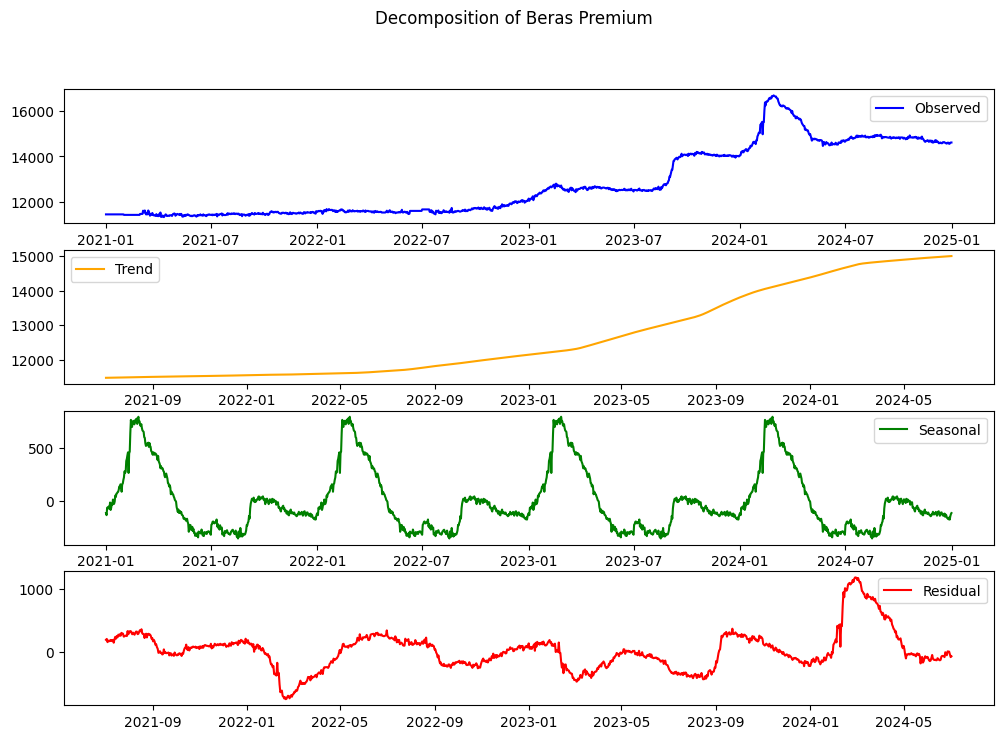

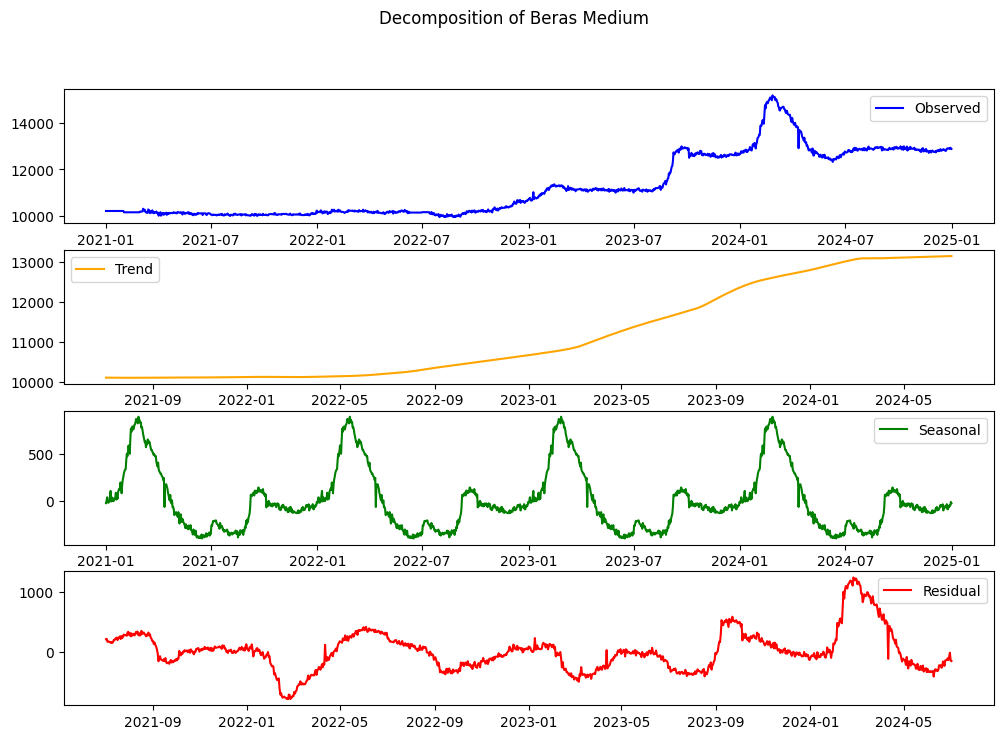

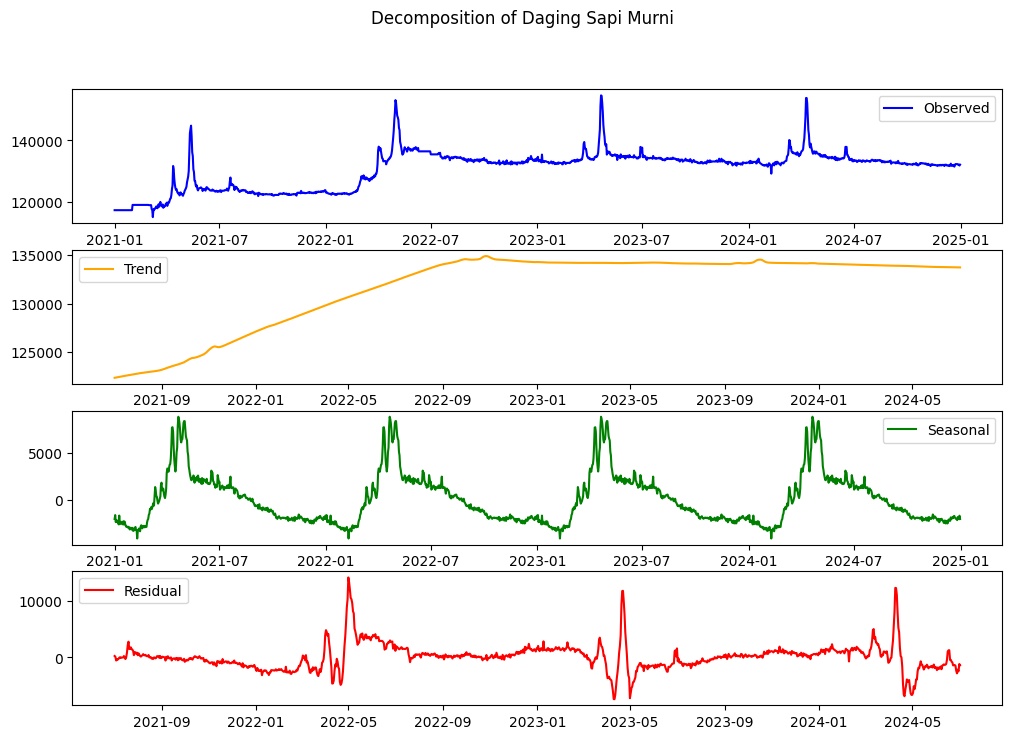

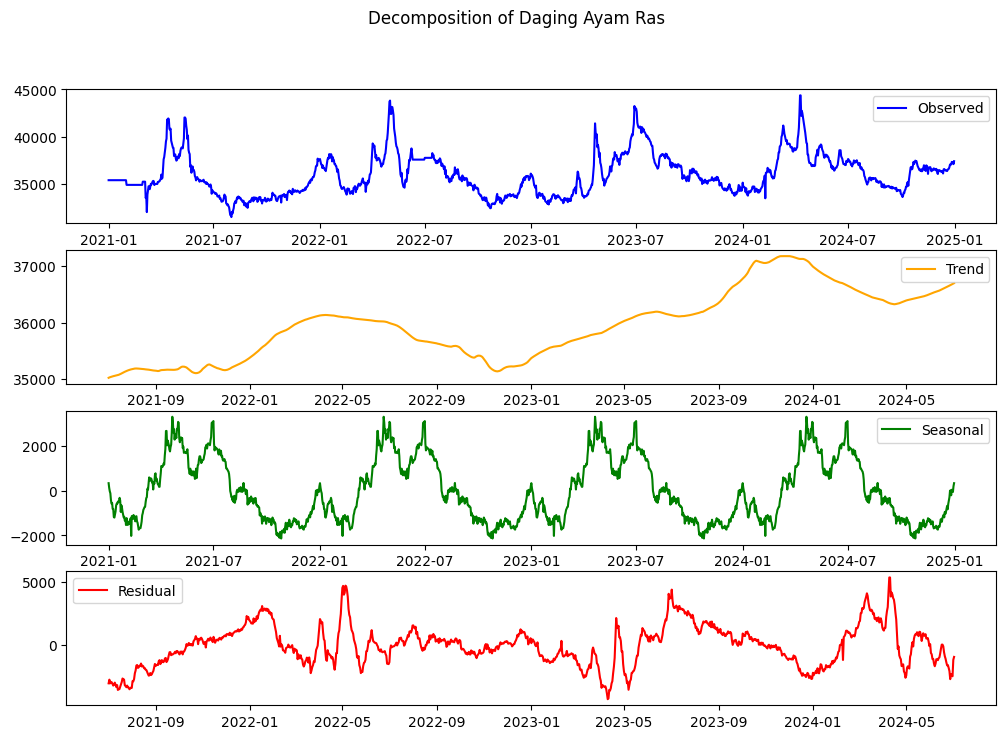

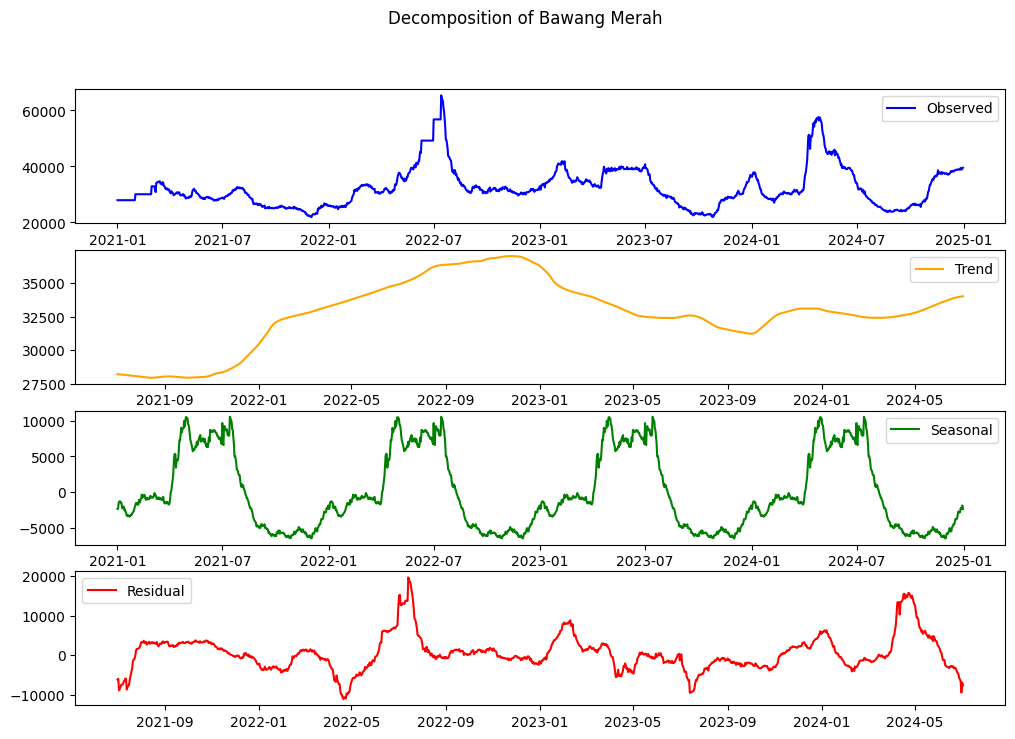

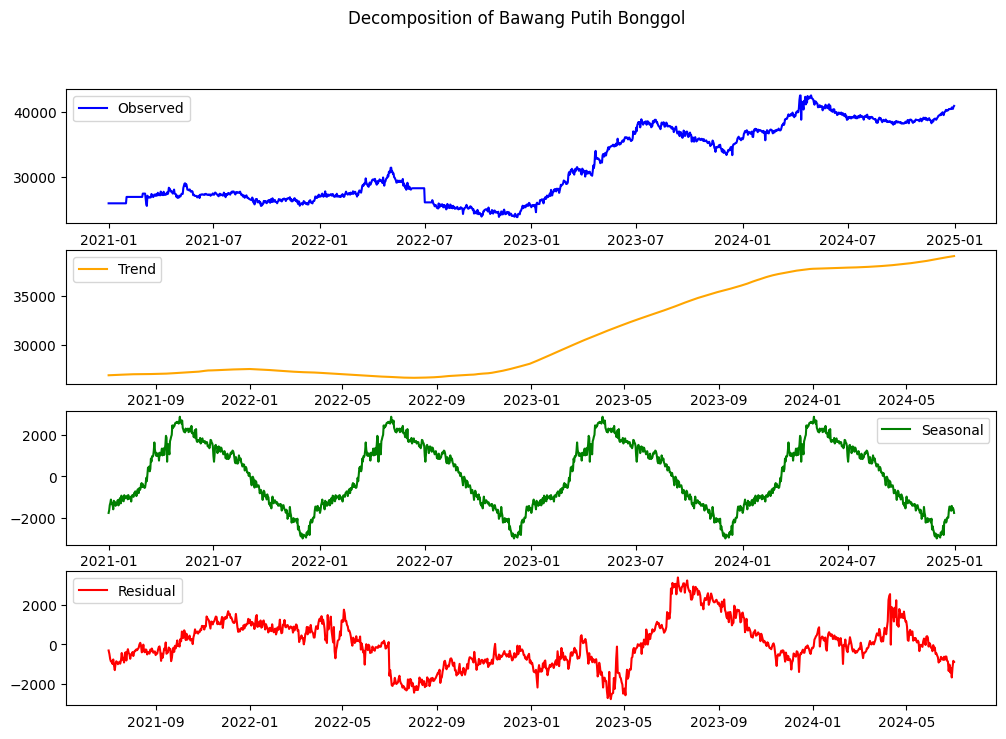

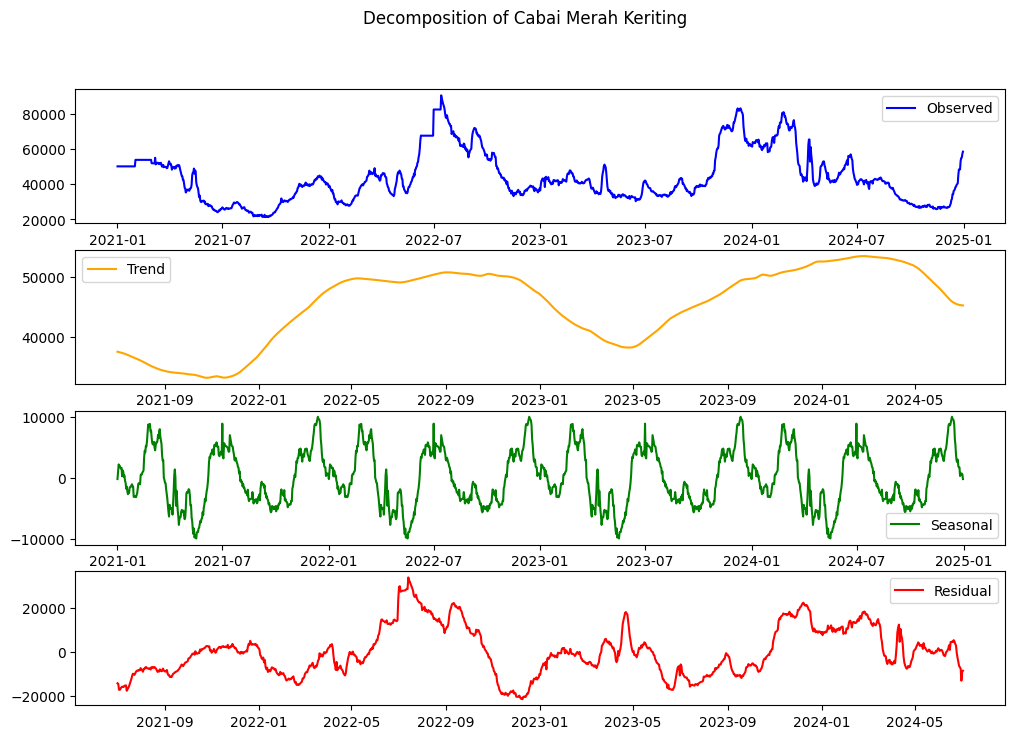

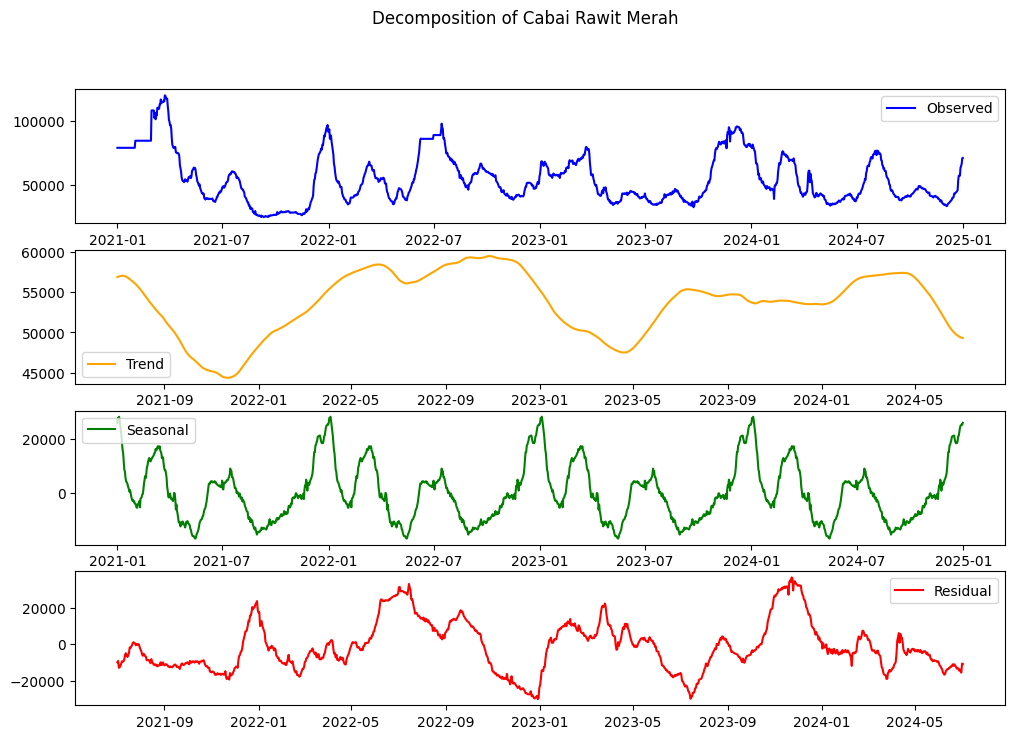

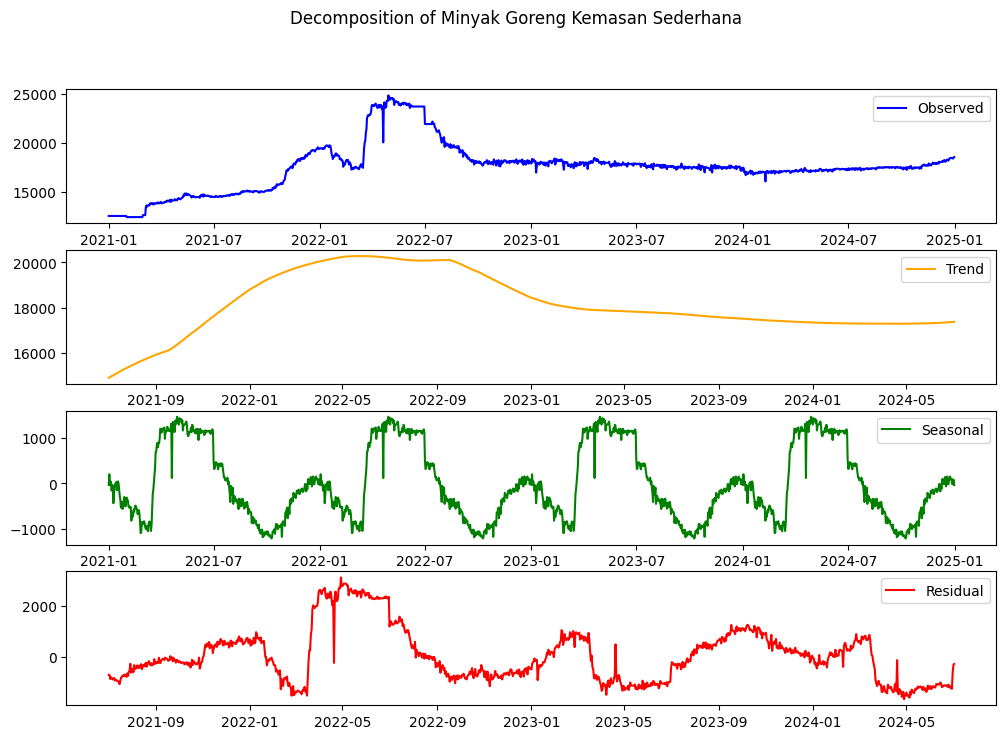

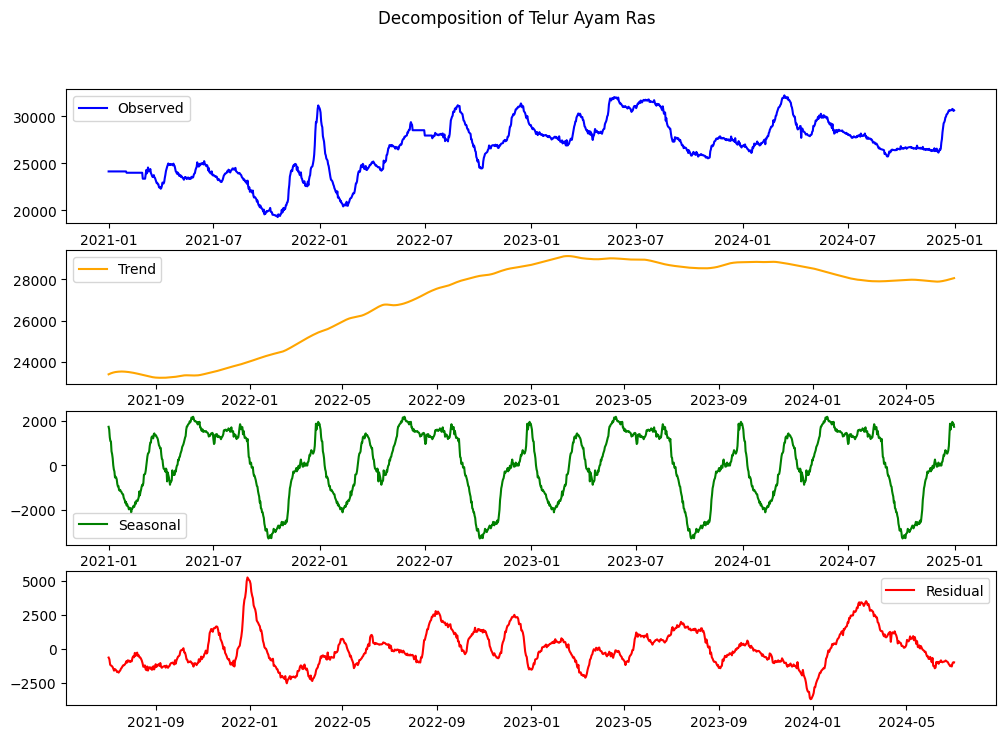

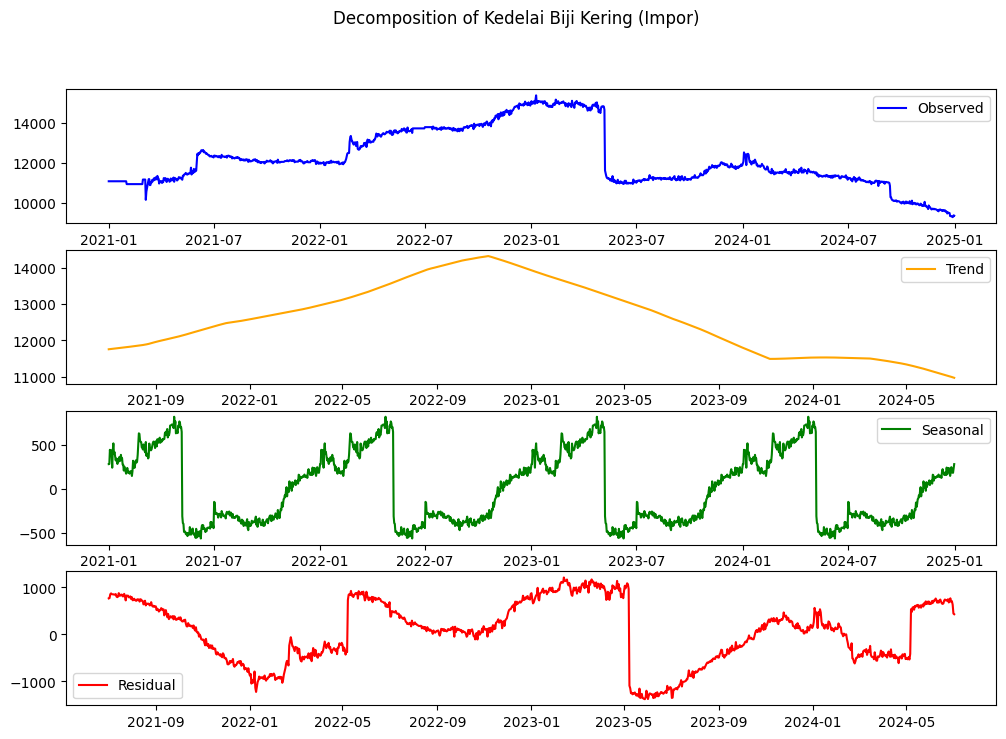

In [ ]:
# Tetapkan kolom Tanggal sebagai index
df_merged2 = df_merged.set_index('Tanggal').copy()

# Pilih kolom target untuk decomposing (misalnya Beras Premium, Daging Sapi Murni, dll.)
# target_columns = ['Beras Premium', 'Daging Sapi Murni', 'Daging Ayam Ras']  # Sesuaikan dengan data
target_columns = ['Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras', 'Bawang Merah',
                  'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Cabai Rawit Merah',
                  'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras',
                  'Kedelai Biji Kering (Impor)']  # Sesuaikan dengan data

# Loop melalui setiap kolom target dan lakukan decomposing
for column_name in target_columns:
    # Membaca data kolom target
    train_column = df_merged2[column_name]

    # Melakukan decomposing
    result = seasonal_decompose(train_column, model='additive', period=365)  # Sesuaikan periode musiman dengan data harian

    # Plot hasil decomposing
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(result.observed, label='Observed', color='blue')
    plt.legend()
    plt.subplot(4, 1, 2)
    plt.plot(result.trend, label='Trend', color='orange')
    plt.legend()
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.legend()
    plt.subplot(4, 1, 4)
    plt.plot(result.resid, label='Residual', color='red')
    plt.legend()
    plt.suptitle(f'Decomposition of {column_name}')
    plt.show()

## Pengecekan Kestasioneran Data

Dalam konteks uji ADF:

Hipotesis nol: Data memiliki akar unit (tidak stasioner).
Hipotesis alternatif: Data tidak memiliki akar unit (stasioner).
Jika p-value < 0,05:

Kita tolak hipotesis nol.
Artinya, kita cukup yakin untuk mengatakan bahwa data tidak memiliki akar unit, atau dengan kata lain, data adalah stasioner.
Jika p-value ≥ 0,05:

Kita gagal menolak hipotesis nol.
Artinya, kita tidak memiliki cukup bukti untuk mengatakan bahwa data stasioner.

Checking stationarity for Beras Premium:

ADF Statistic: -1.1773111455568974
p-value: 0.6832789517640588
Critical Values:
   1%: -3.434880391815318
   5%: -2.8635408625359315
   10%: -2.5678352438452814

Beras Premium is not stationary (p-value >= 0.05)



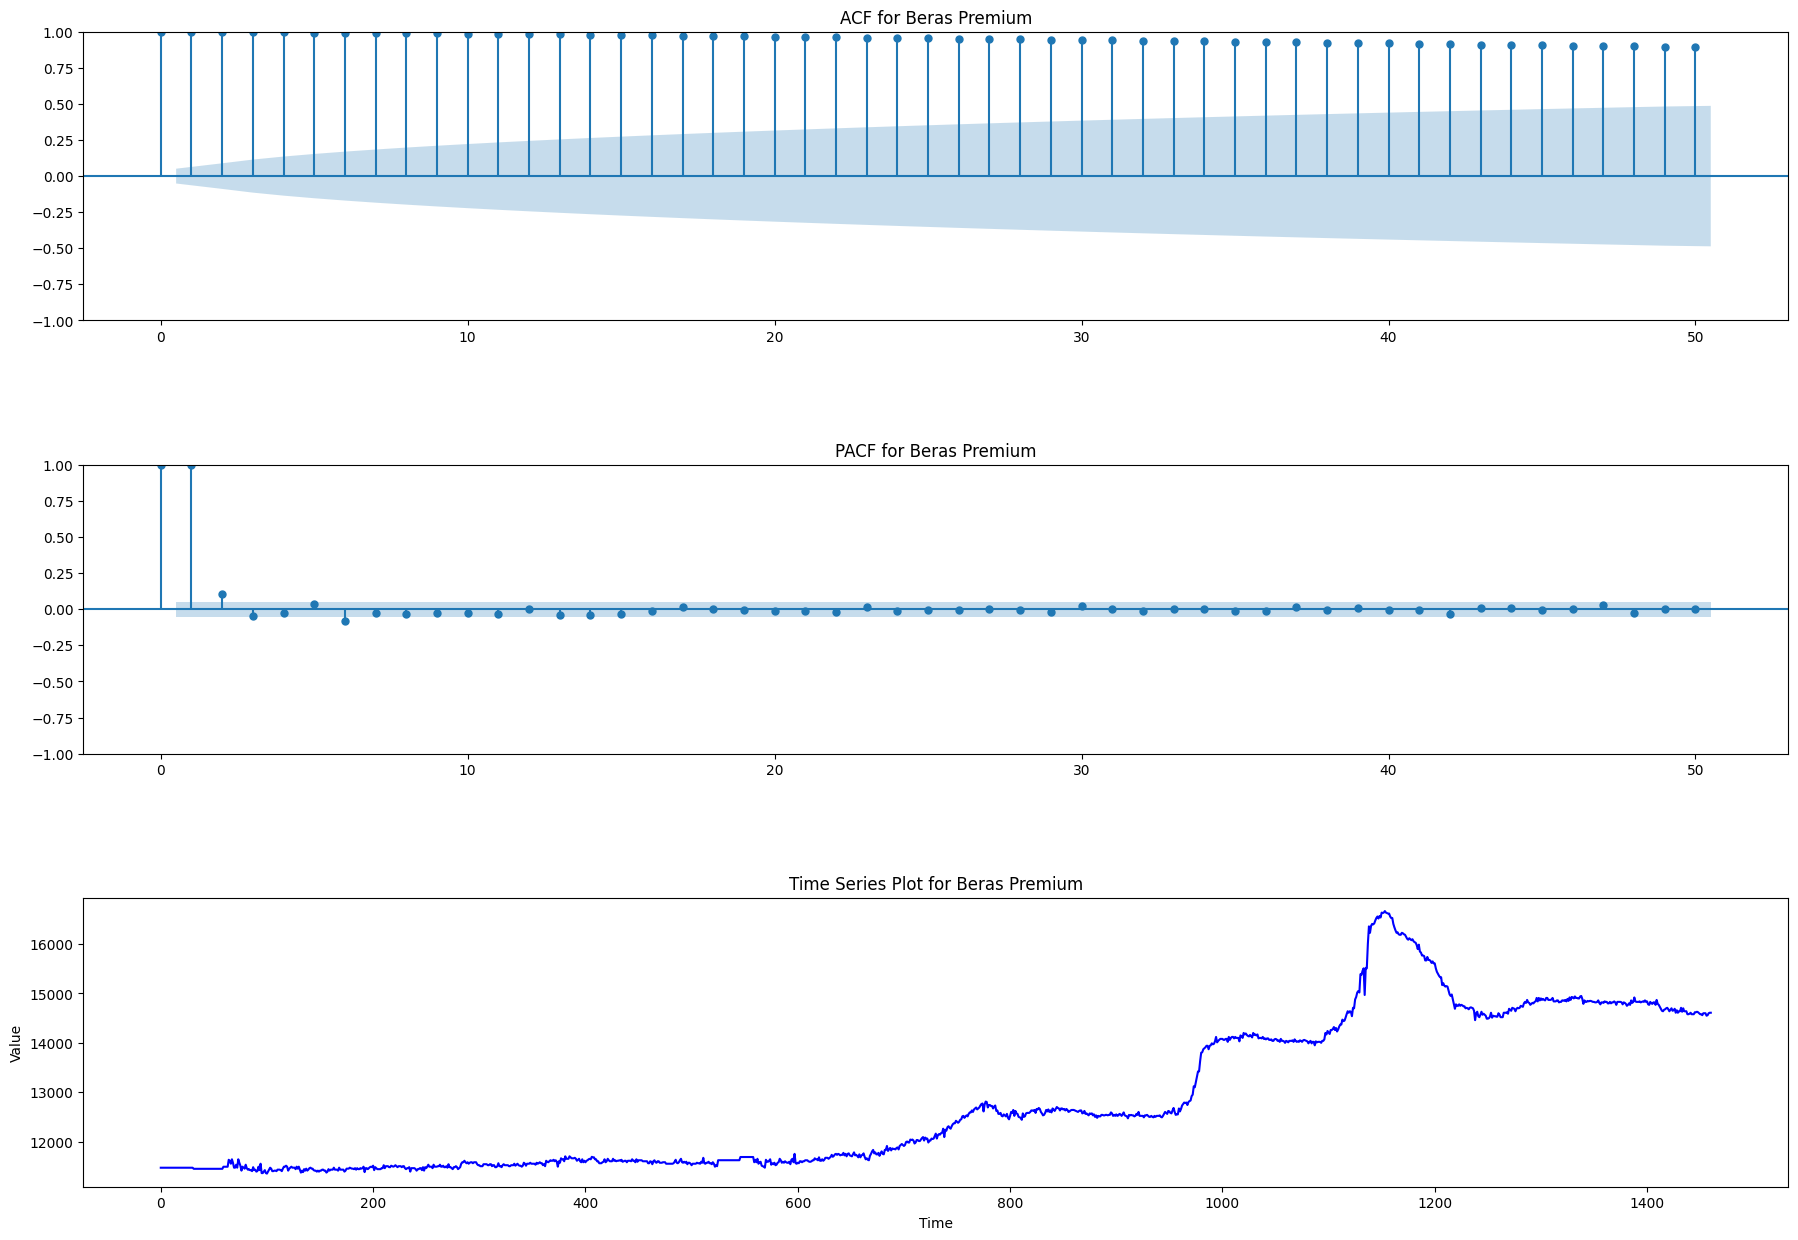

Checking stationarity for Beras Medium:

ADF Statistic: -1.1687911508017788
p-value: 0.6868748757166978
Critical Values:
   1%: -3.434911997169608
   5%: -2.863554810504947
   10%: -2.567842671398422

Beras Medium is not stationary (p-value >= 0.05)



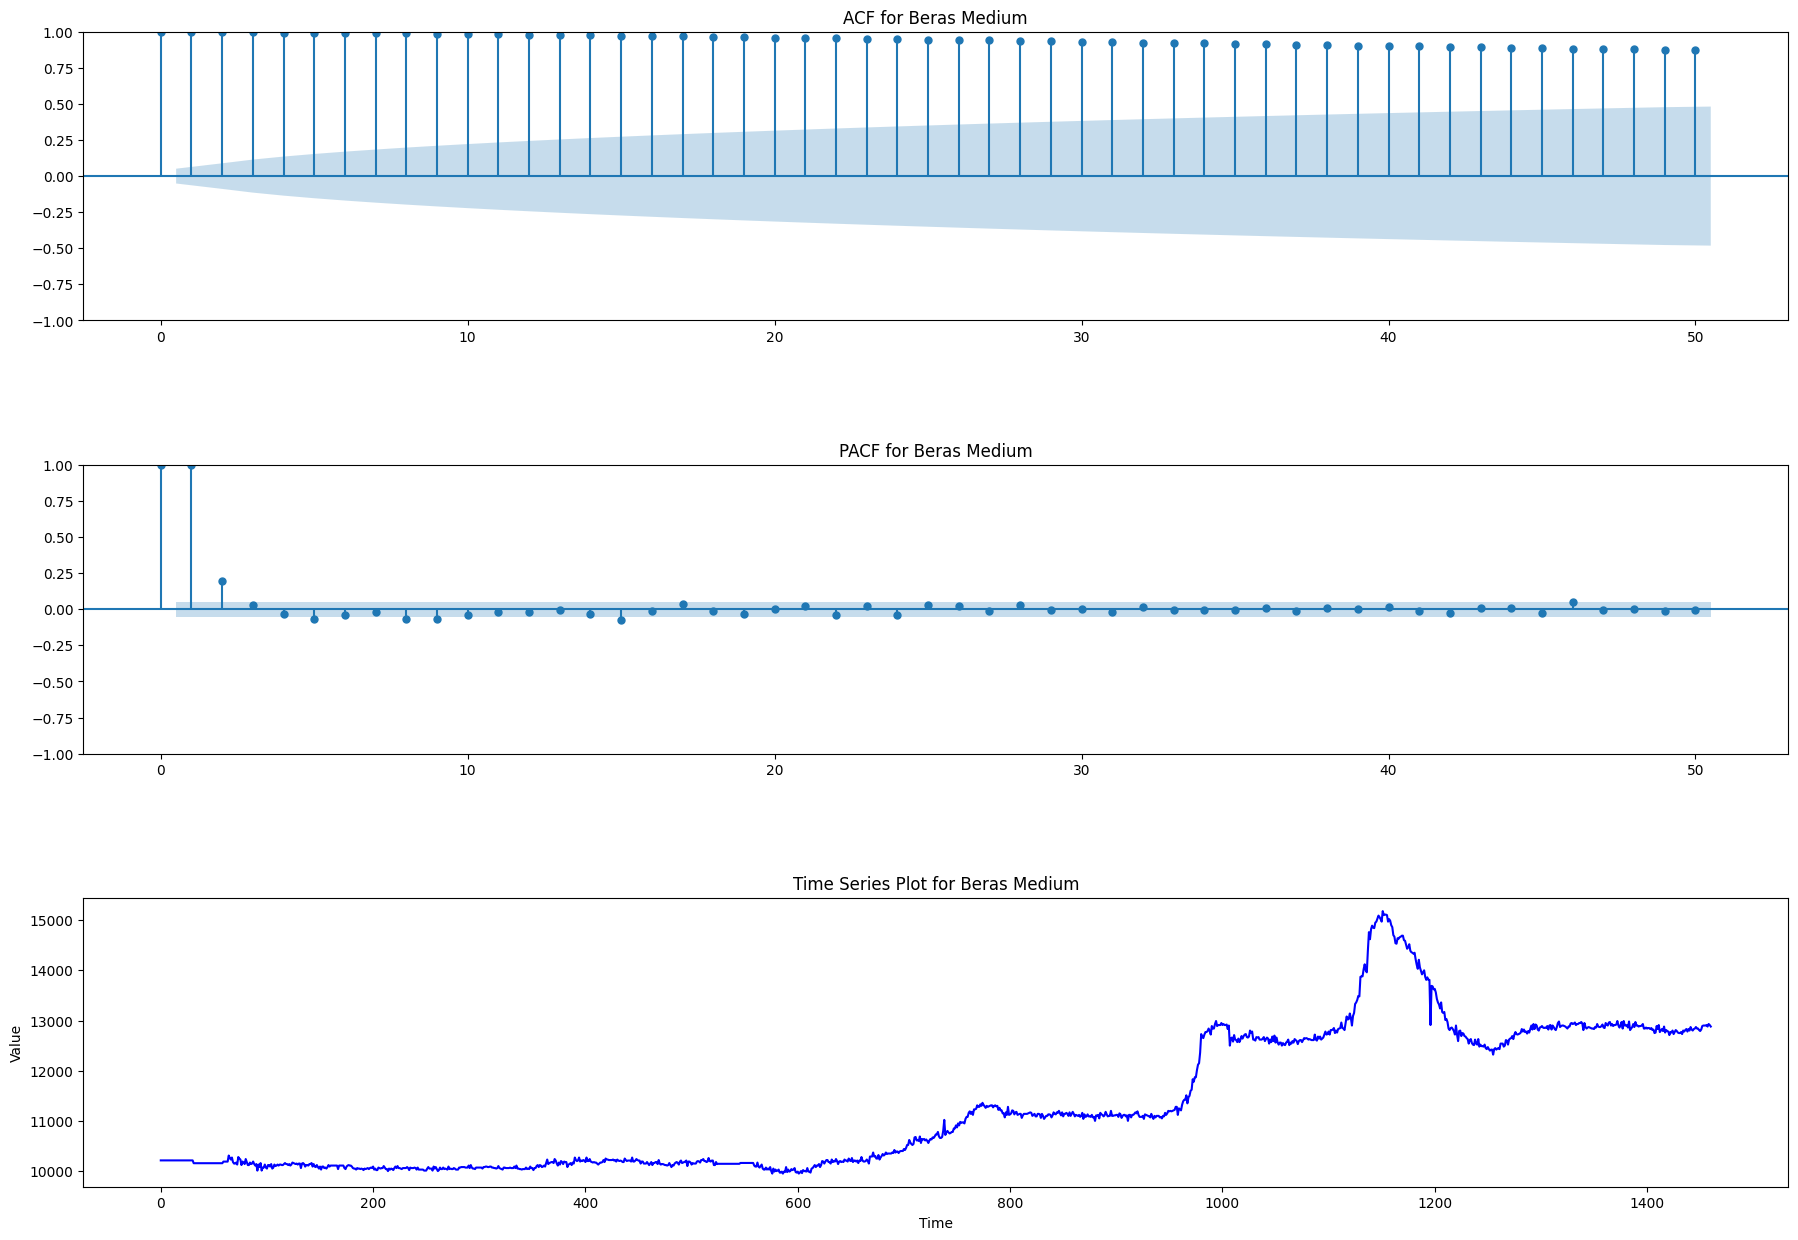

Checking stationarity for Daging Sapi Murni:

ADF Statistic: -2.4746816980447597
p-value: 0.12175668859423494
Critical Values:
   1%: -3.434908816804013
   5%: -2.863553406963303
   10%: -2.5678419239852994

Daging Sapi Murni is not stationary (p-value >= 0.05)



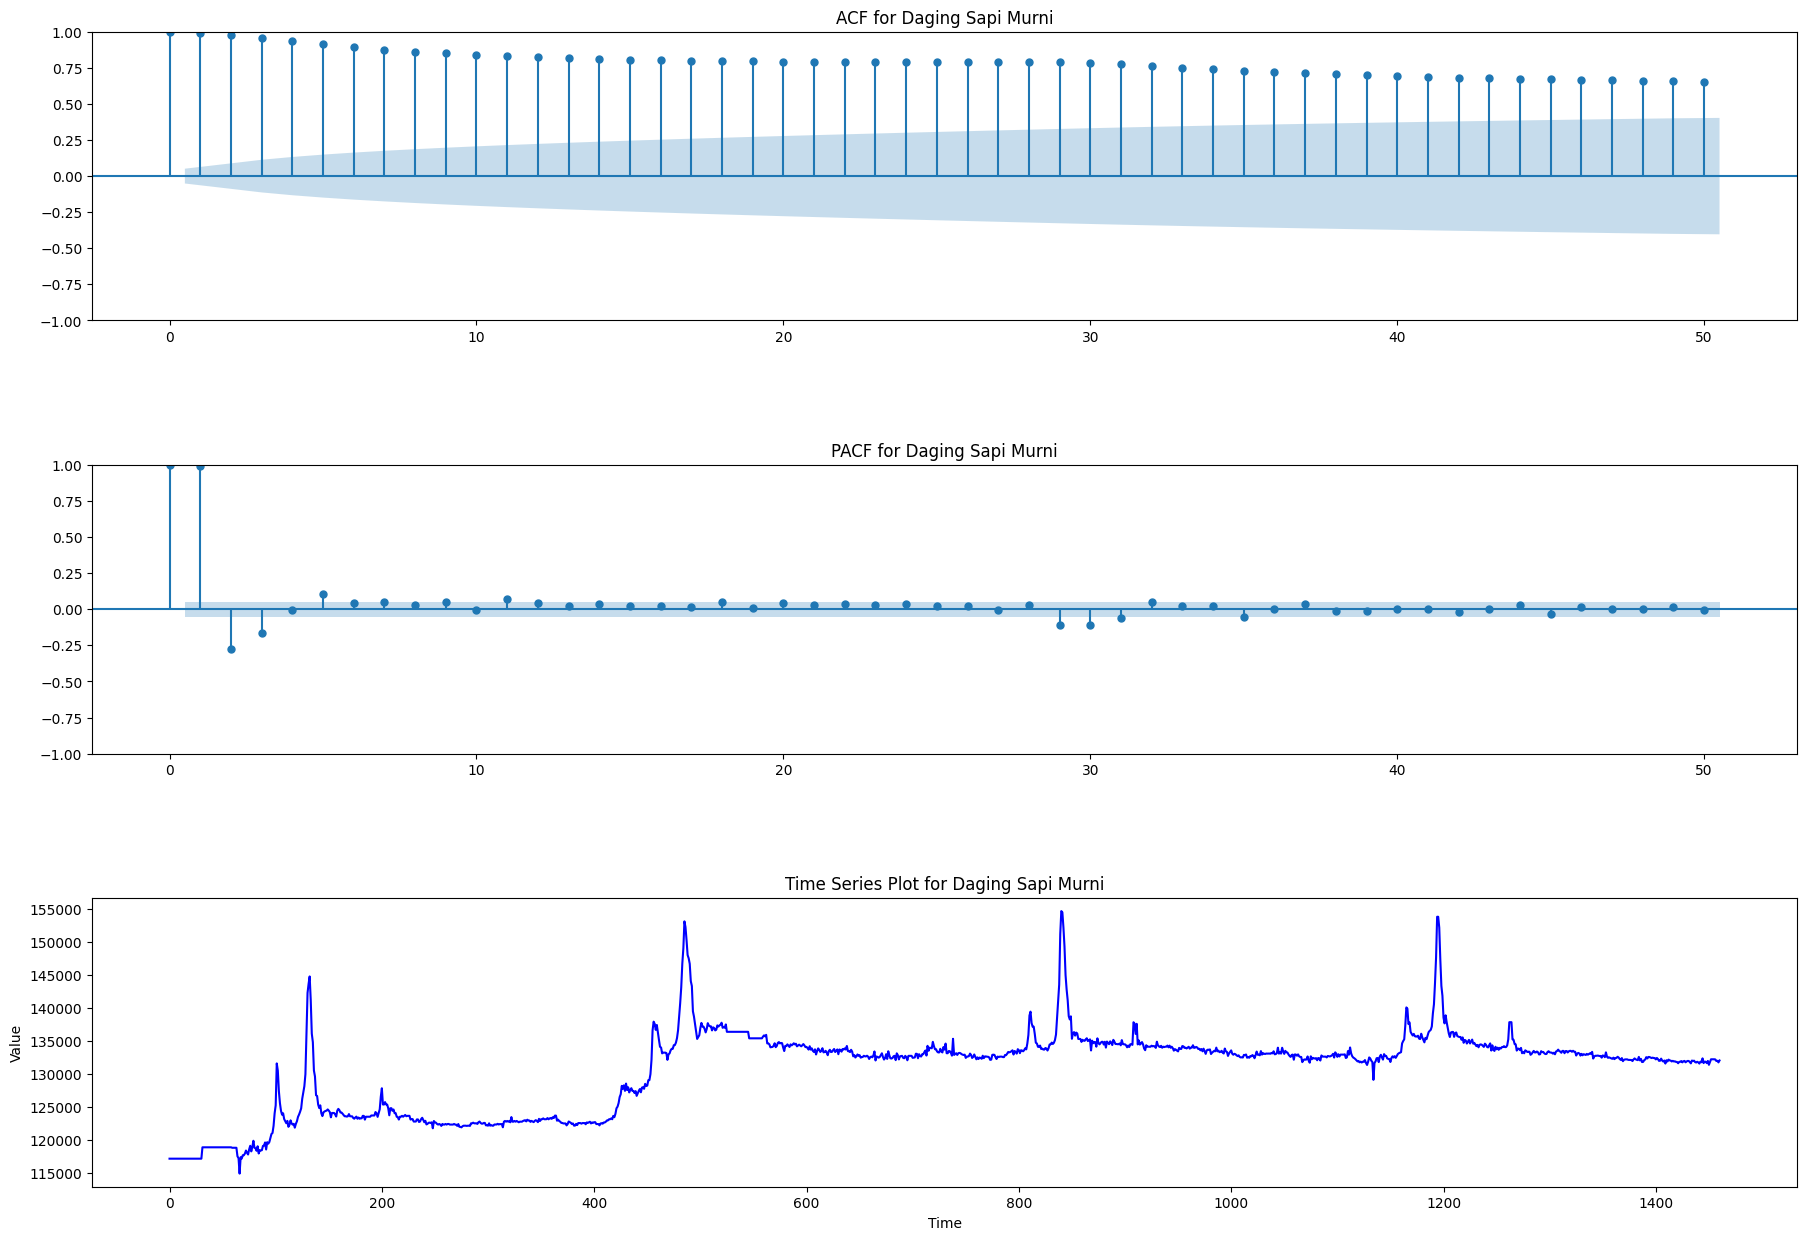

Checking stationarity for Daging Ayam Ras:

ADF Statistic: -3.7852762036632237
p-value: 0.0030616026164109497
Critical Values:
   1%: -3.434874123222469
   5%: -2.8635380960841084
   10%: -2.5678337706609993

Daging Ayam Ras is stationary (p-value < 0.05)



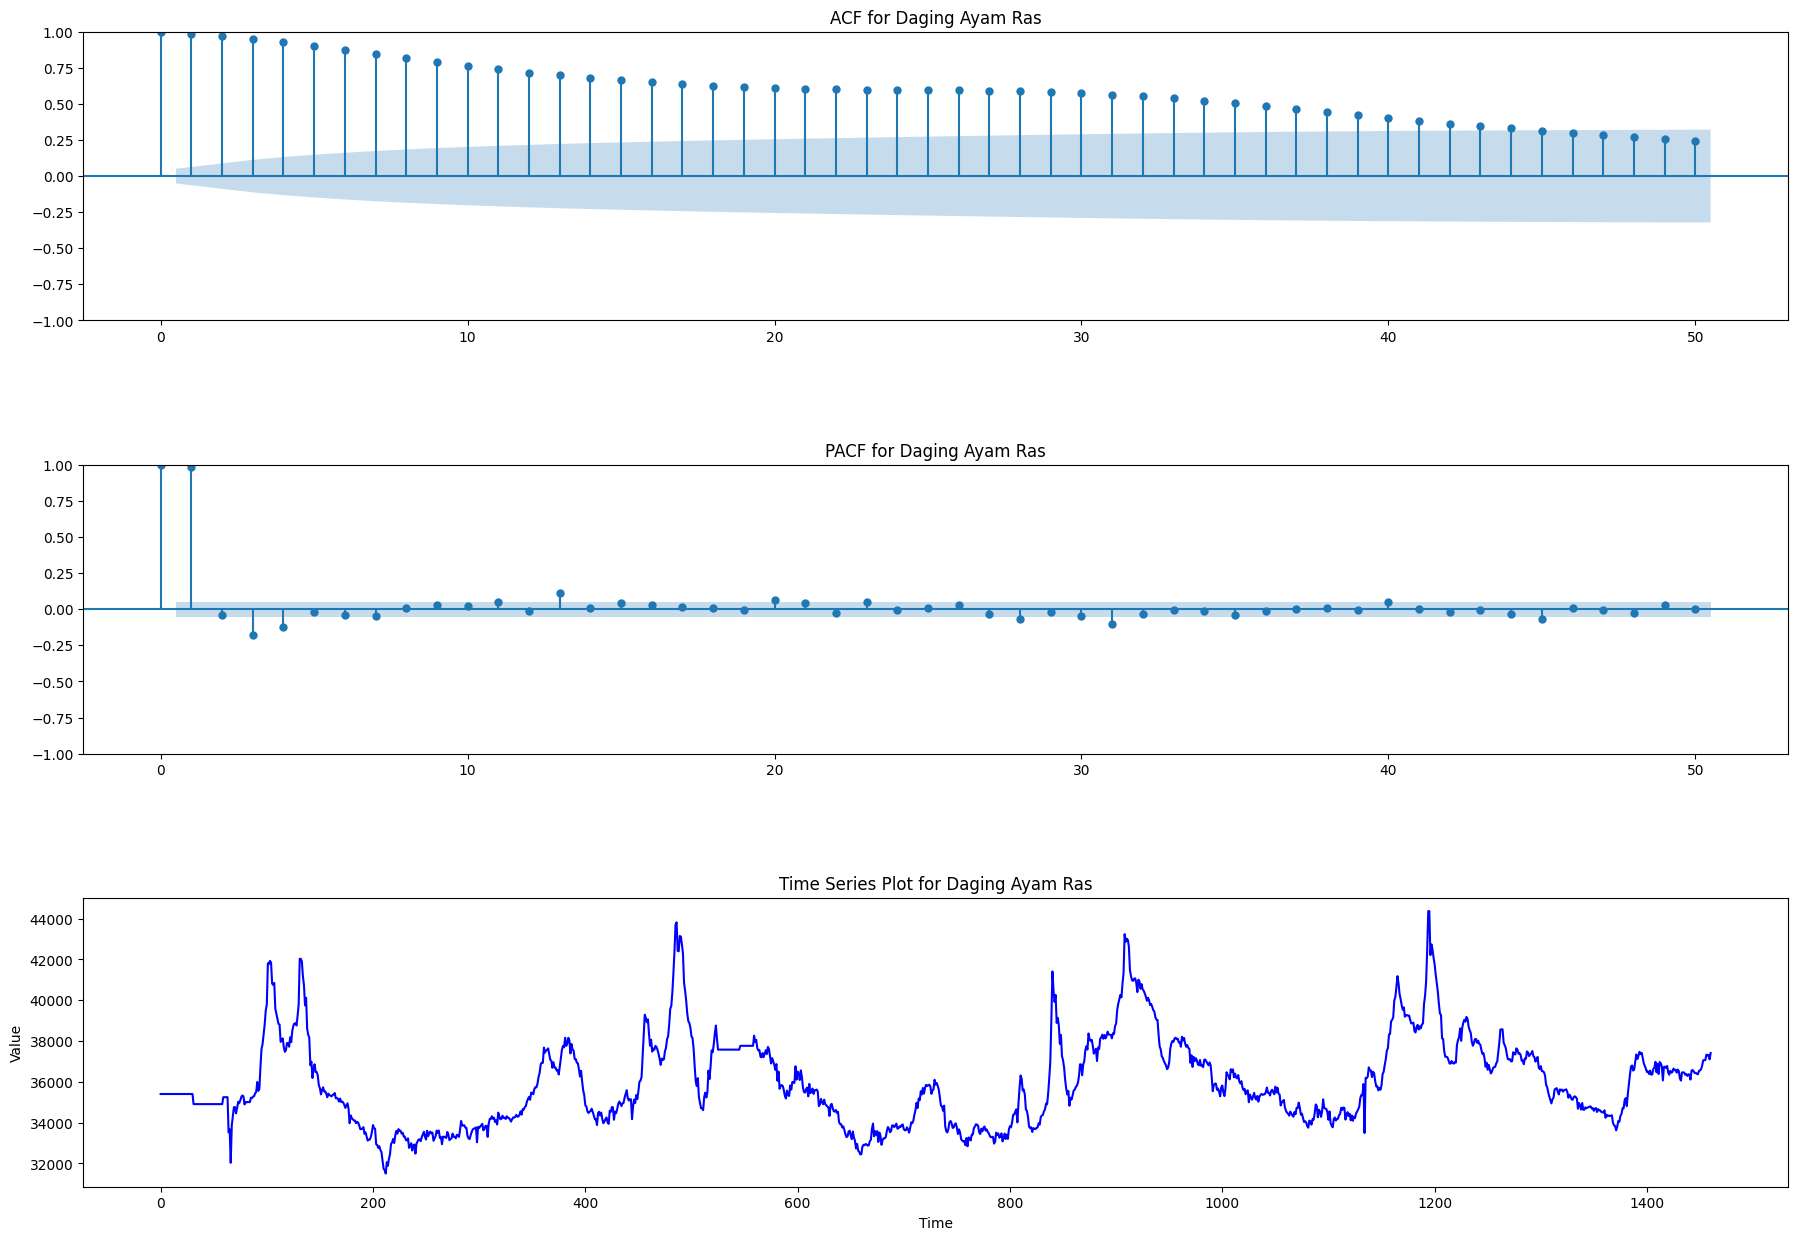

Checking stationarity for Bawang Merah:

ADF Statistic: -3.5311631228714857
p-value: 0.0072219128688771
Critical Values:
   1%: -3.4349024693573584
   5%: -2.8635506057382325
   10%: -2.5678404322793846

Bawang Merah is stationary (p-value < 0.05)



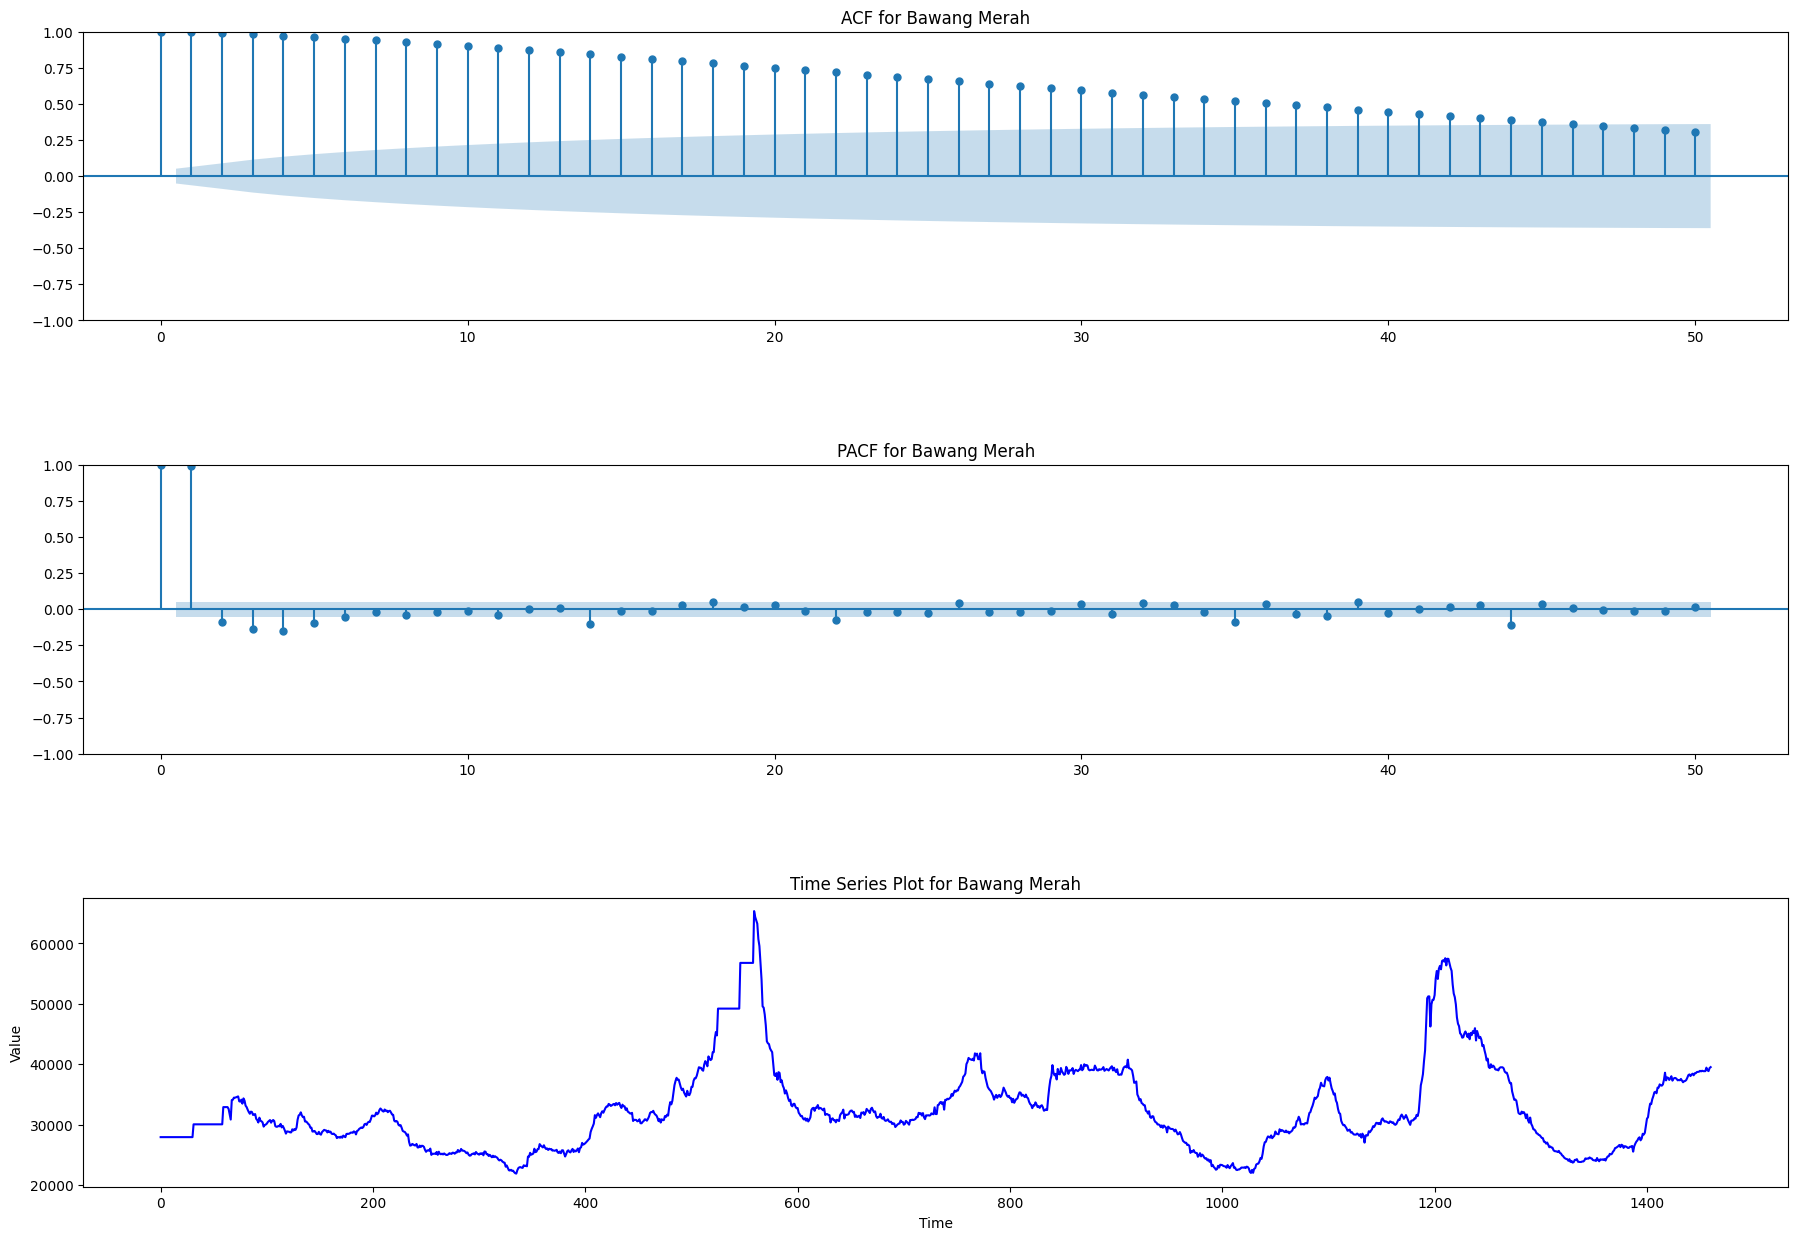

Checking stationarity for Bawang Putih Bonggol:

ADF Statistic: -0.036850703293168856
p-value: 0.95537637048867
Critical Values:
   1%: -3.434846127900848
   5%: -2.8635257411342616
   10%: -2.5678271914441395

Bawang Putih Bonggol is not stationary (p-value >= 0.05)



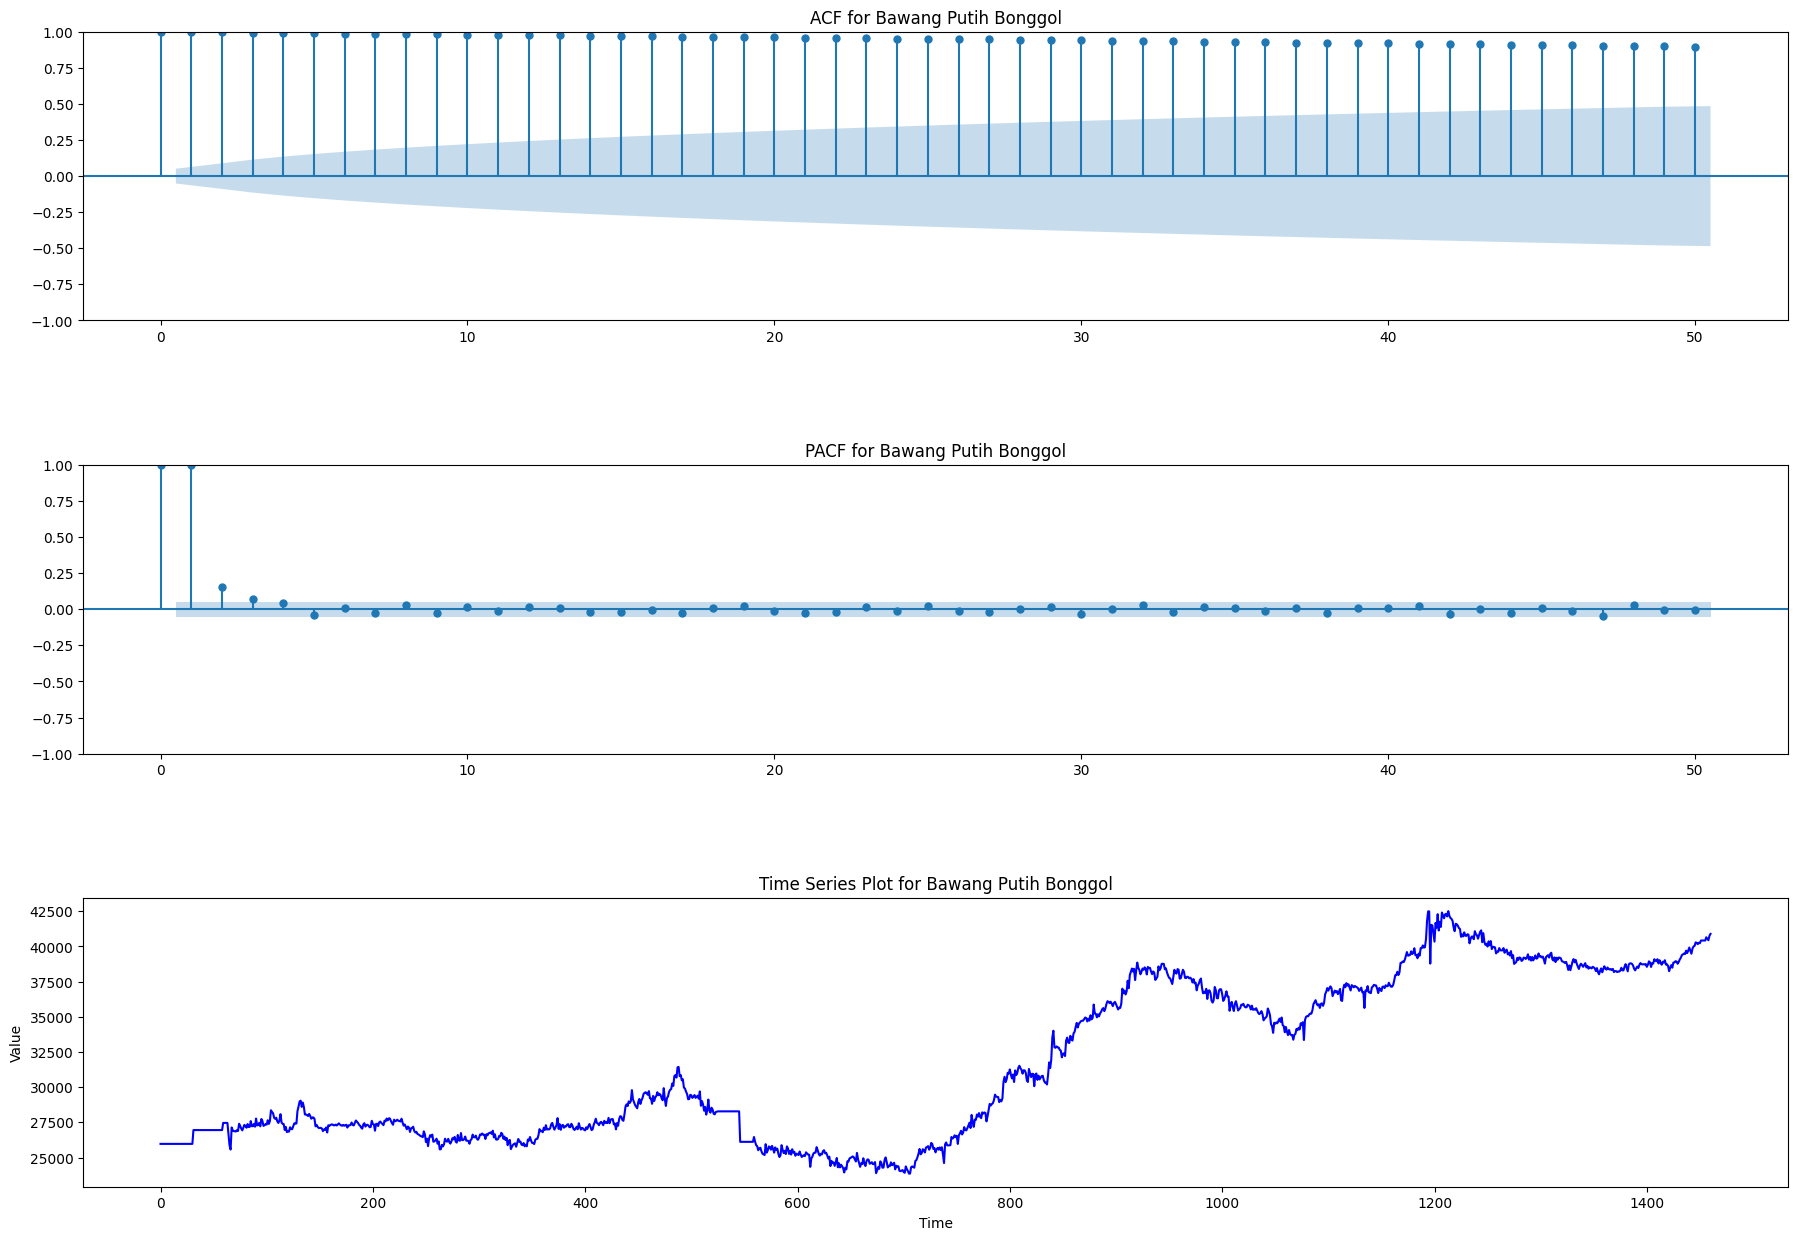

Checking stationarity for Cabai Merah Keriting:

ADF Statistic: -2.6938148299376934
p-value: 0.07511470274441456
Critical Values:
   1%: -3.4348616379354793
   5%: -2.8635325860671696
   10%: -2.567830836482784

Cabai Merah Keriting is not stationary (p-value >= 0.05)



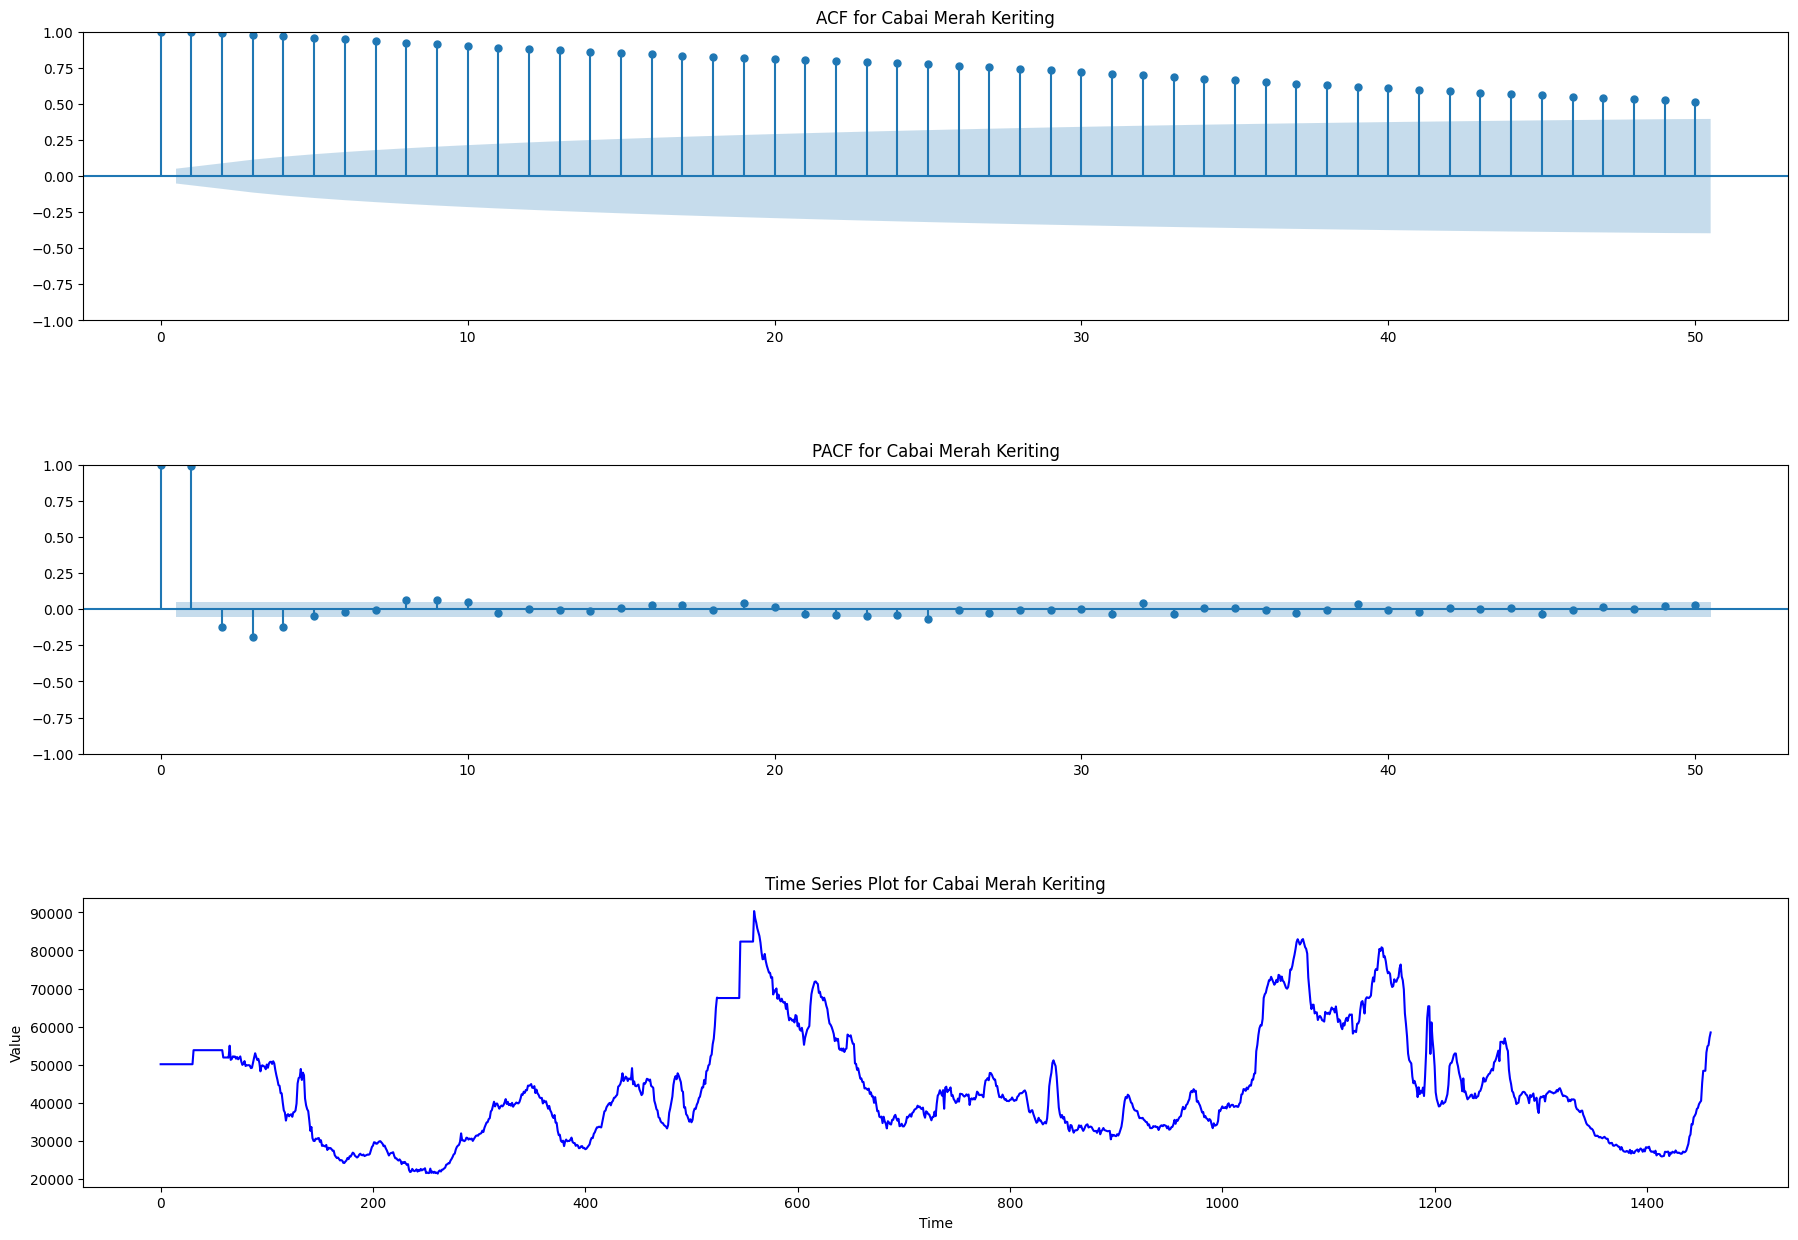

Checking stationarity for Cabai Rawit Merah:

ADF Statistic: -4.596855839576085
p-value: 0.00013090429377144027
Critical Values:
   1%: -3.434880391815318
   5%: -2.8635408625359315
   10%: -2.5678352438452814

Cabai Rawit Merah is stationary (p-value < 0.05)



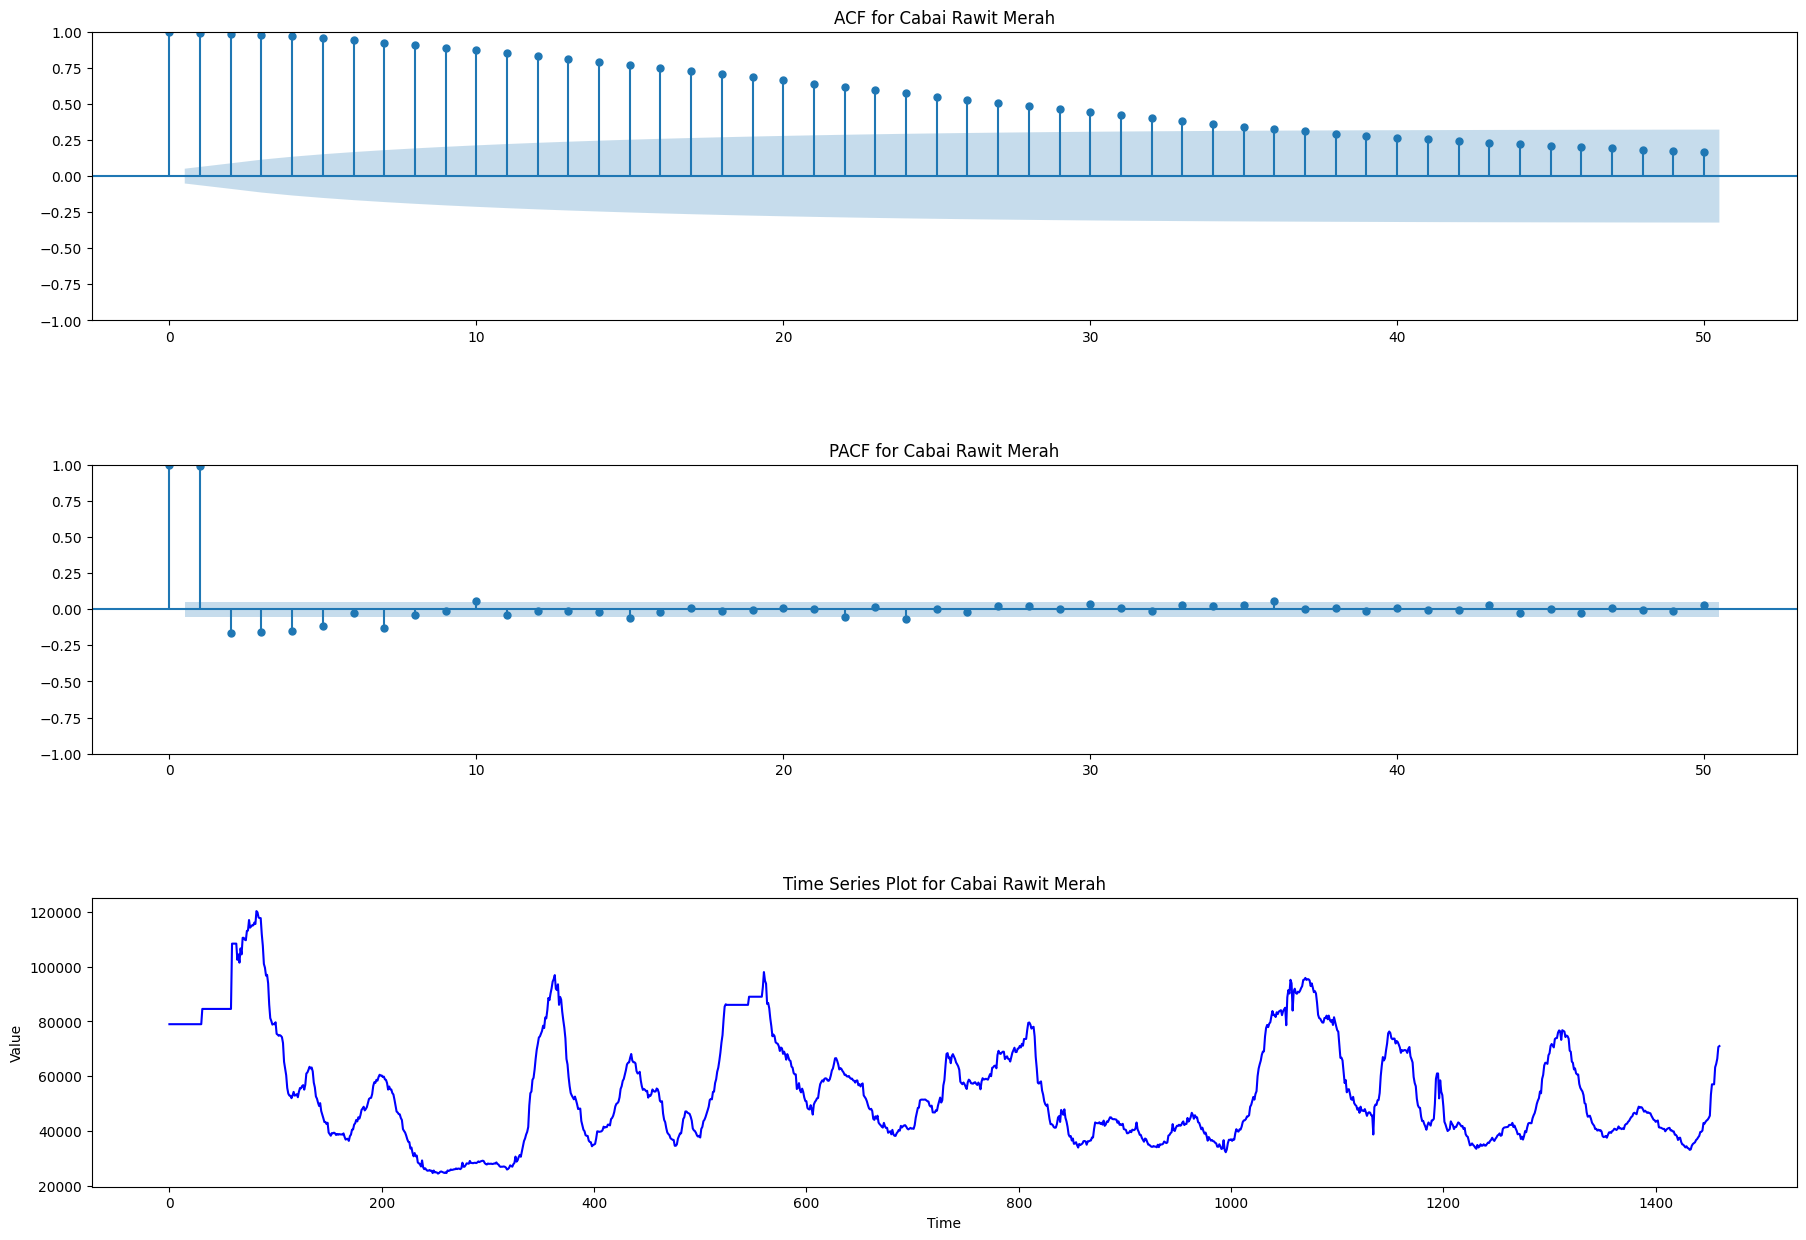

Checking stationarity for Minyak Goreng Kemasan Sederhana:

ADF Statistic: -2.2248835991521343
p-value: 0.1973384075474356
Critical Values:
   1%: -3.4348616379354793
   5%: -2.8635325860671696
   10%: -2.567830836482784

Minyak Goreng Kemasan Sederhana is not stationary (p-value >= 0.05)



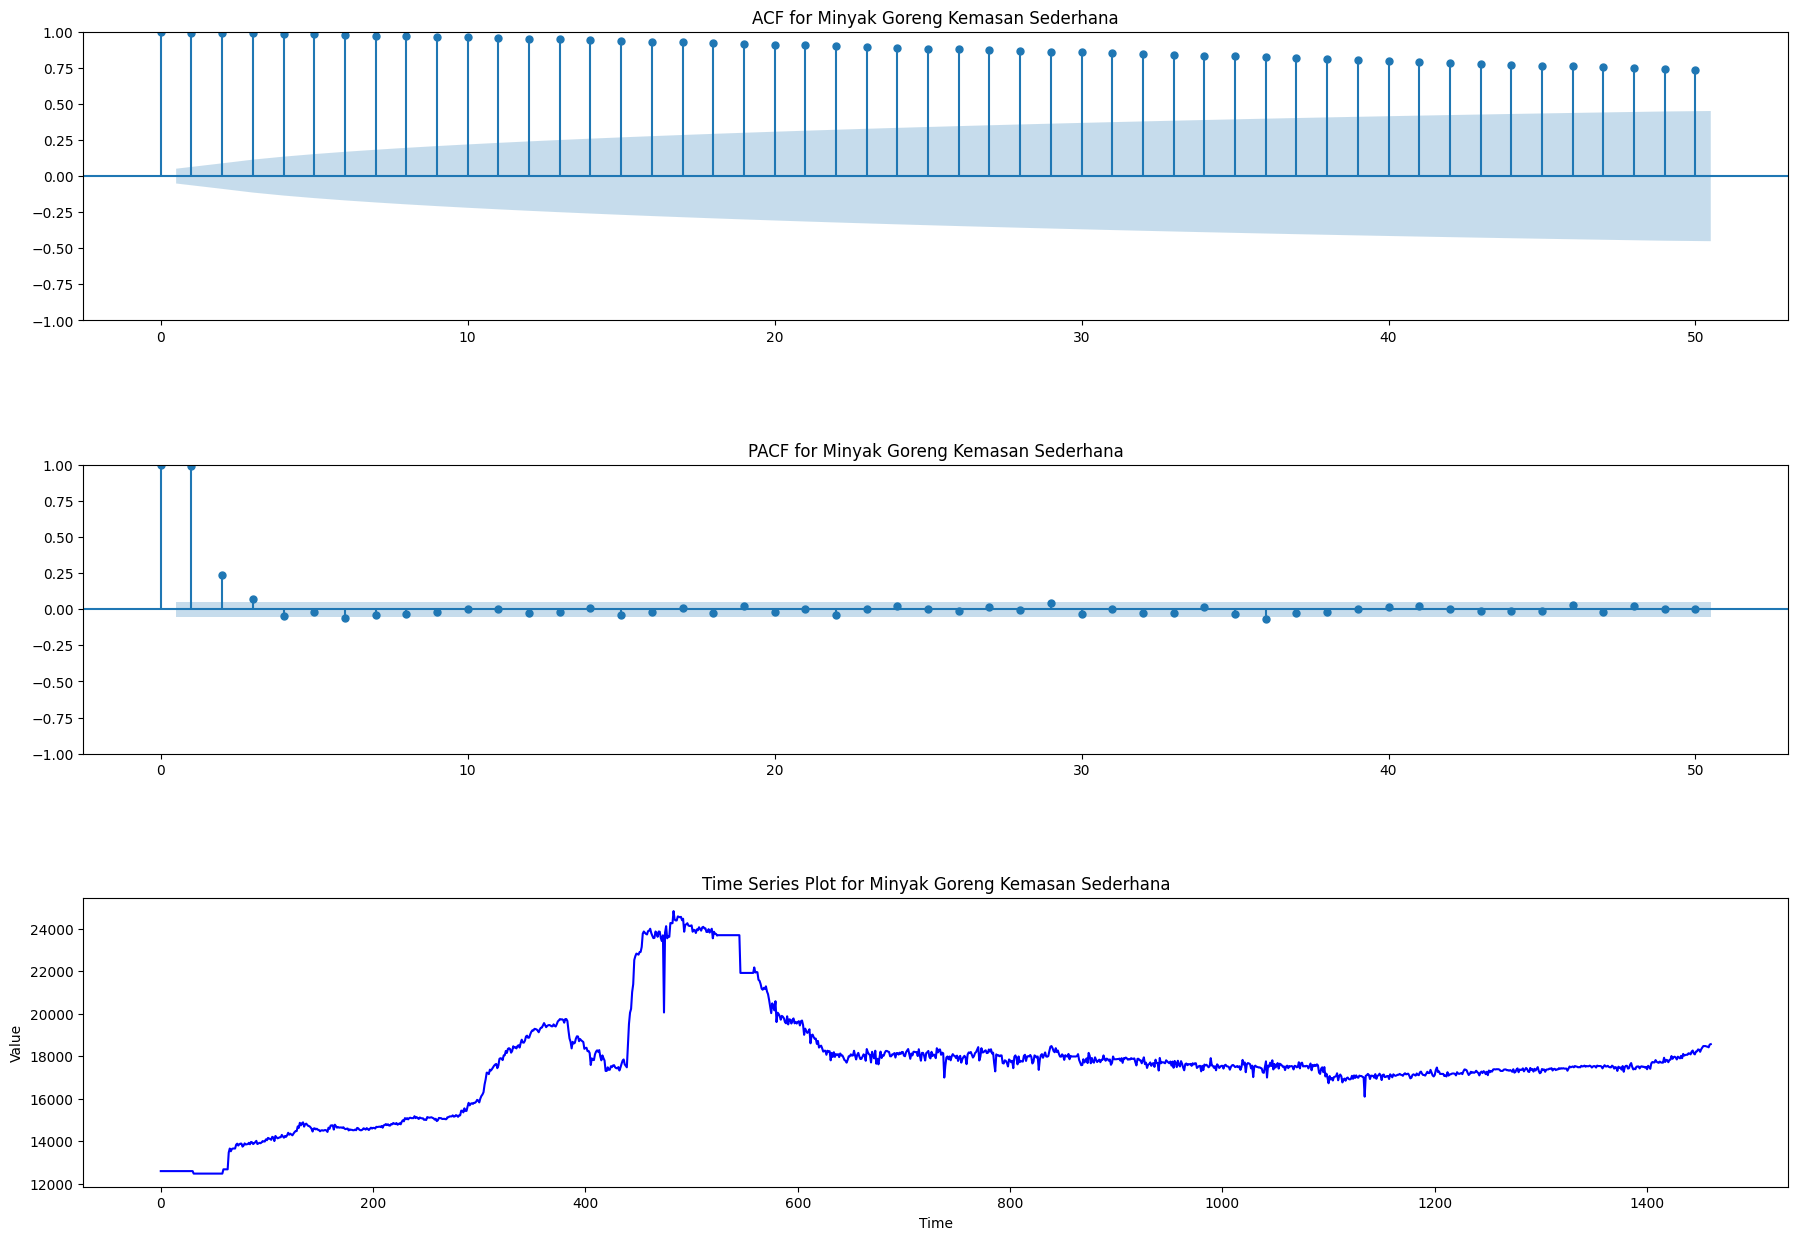

Checking stationarity for Telur Ayam Ras:

ADF Statistic: -3.430730834544926
p-value: 0.00995481898777009
Critical Values:
   1%: -3.4348523191002123
   5%: -2.8635284734563364
   10%: -2.567828646449617

Telur Ayam Ras is stationary (p-value < 0.05)



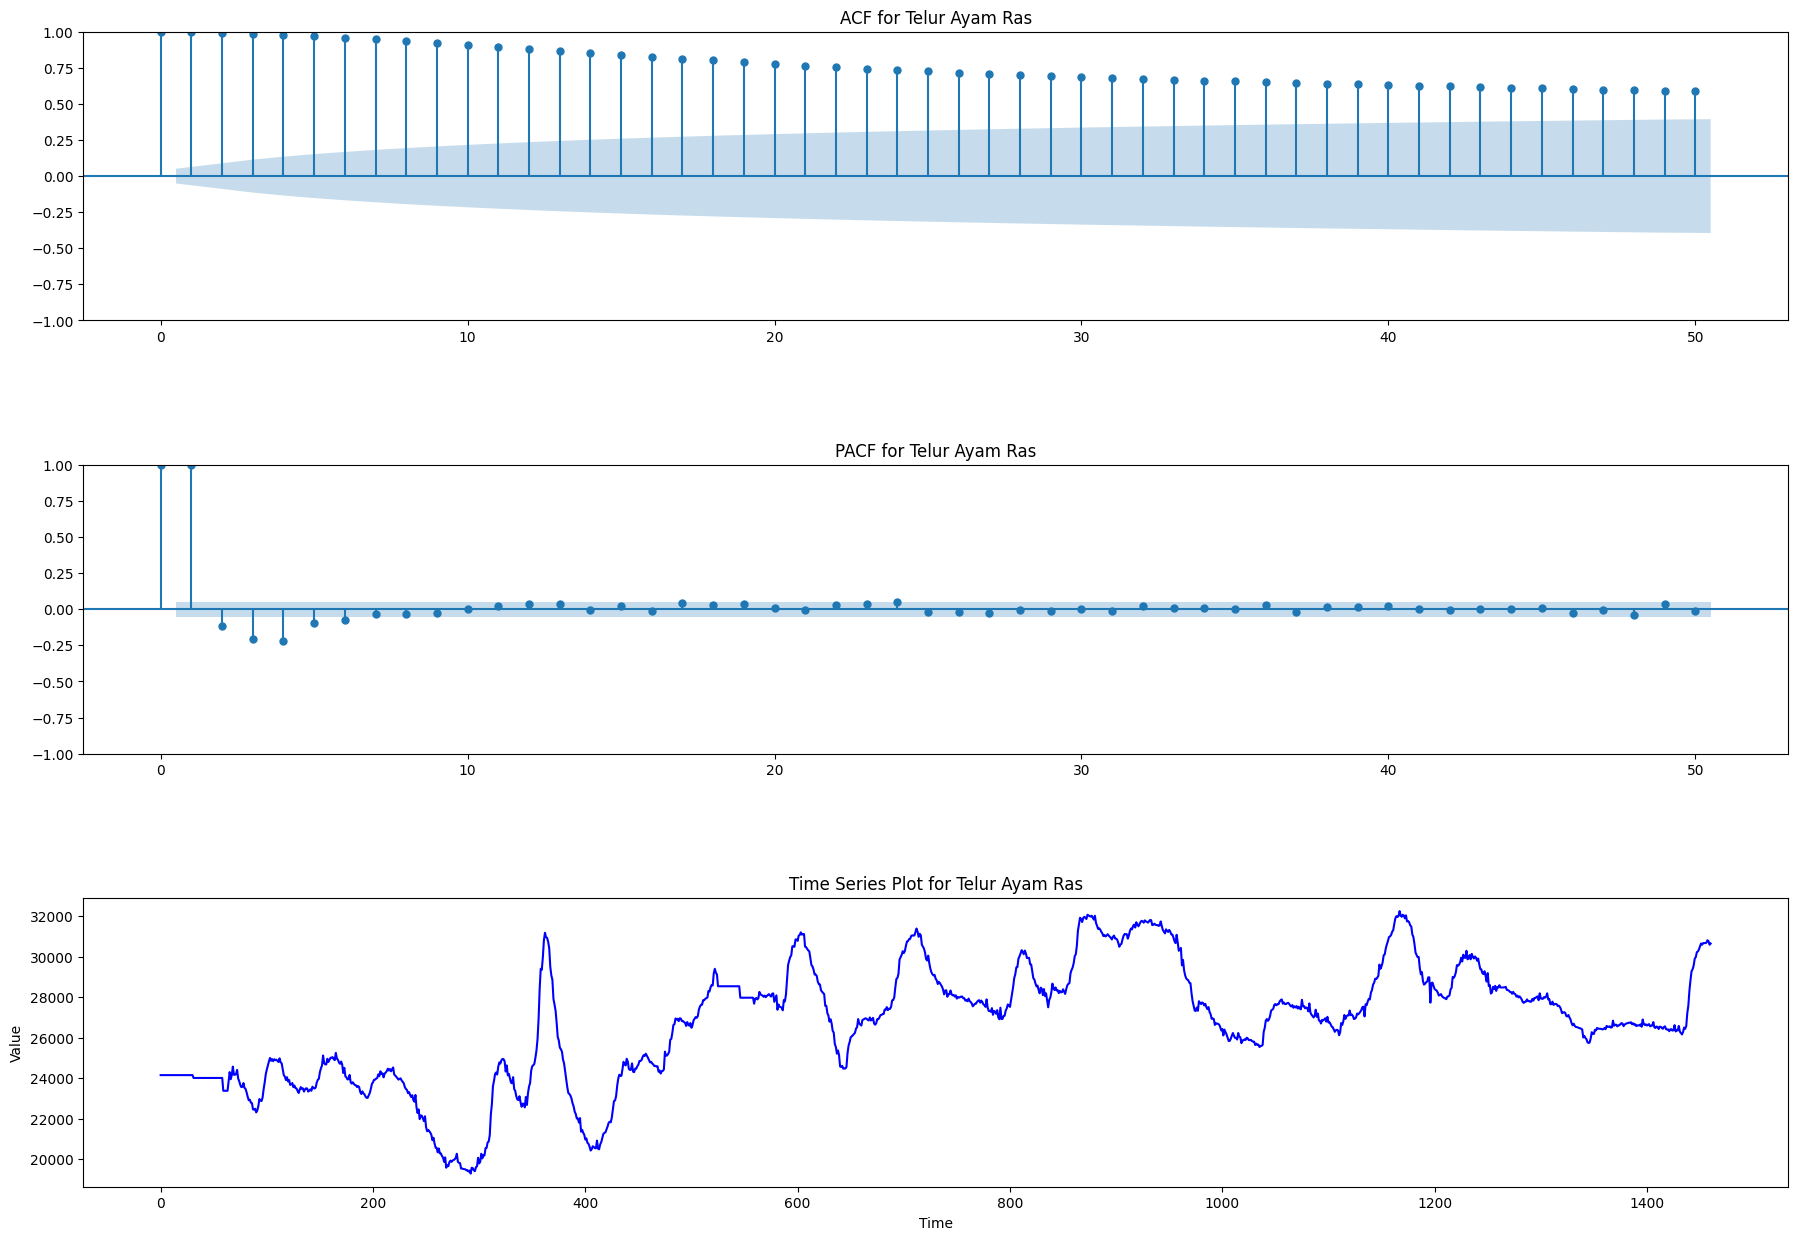

Checking stationarity for Kedelai Biji Kering (Impor):

ADF Statistic: -0.809880898053081
p-value: 0.8162023840192896
Critical Values:
   1%: -3.4348399537053482
   5%: -2.8635230163107837
   10%: -2.5678257404326903

Kedelai Biji Kering (Impor) is not stationary (p-value >= 0.05)



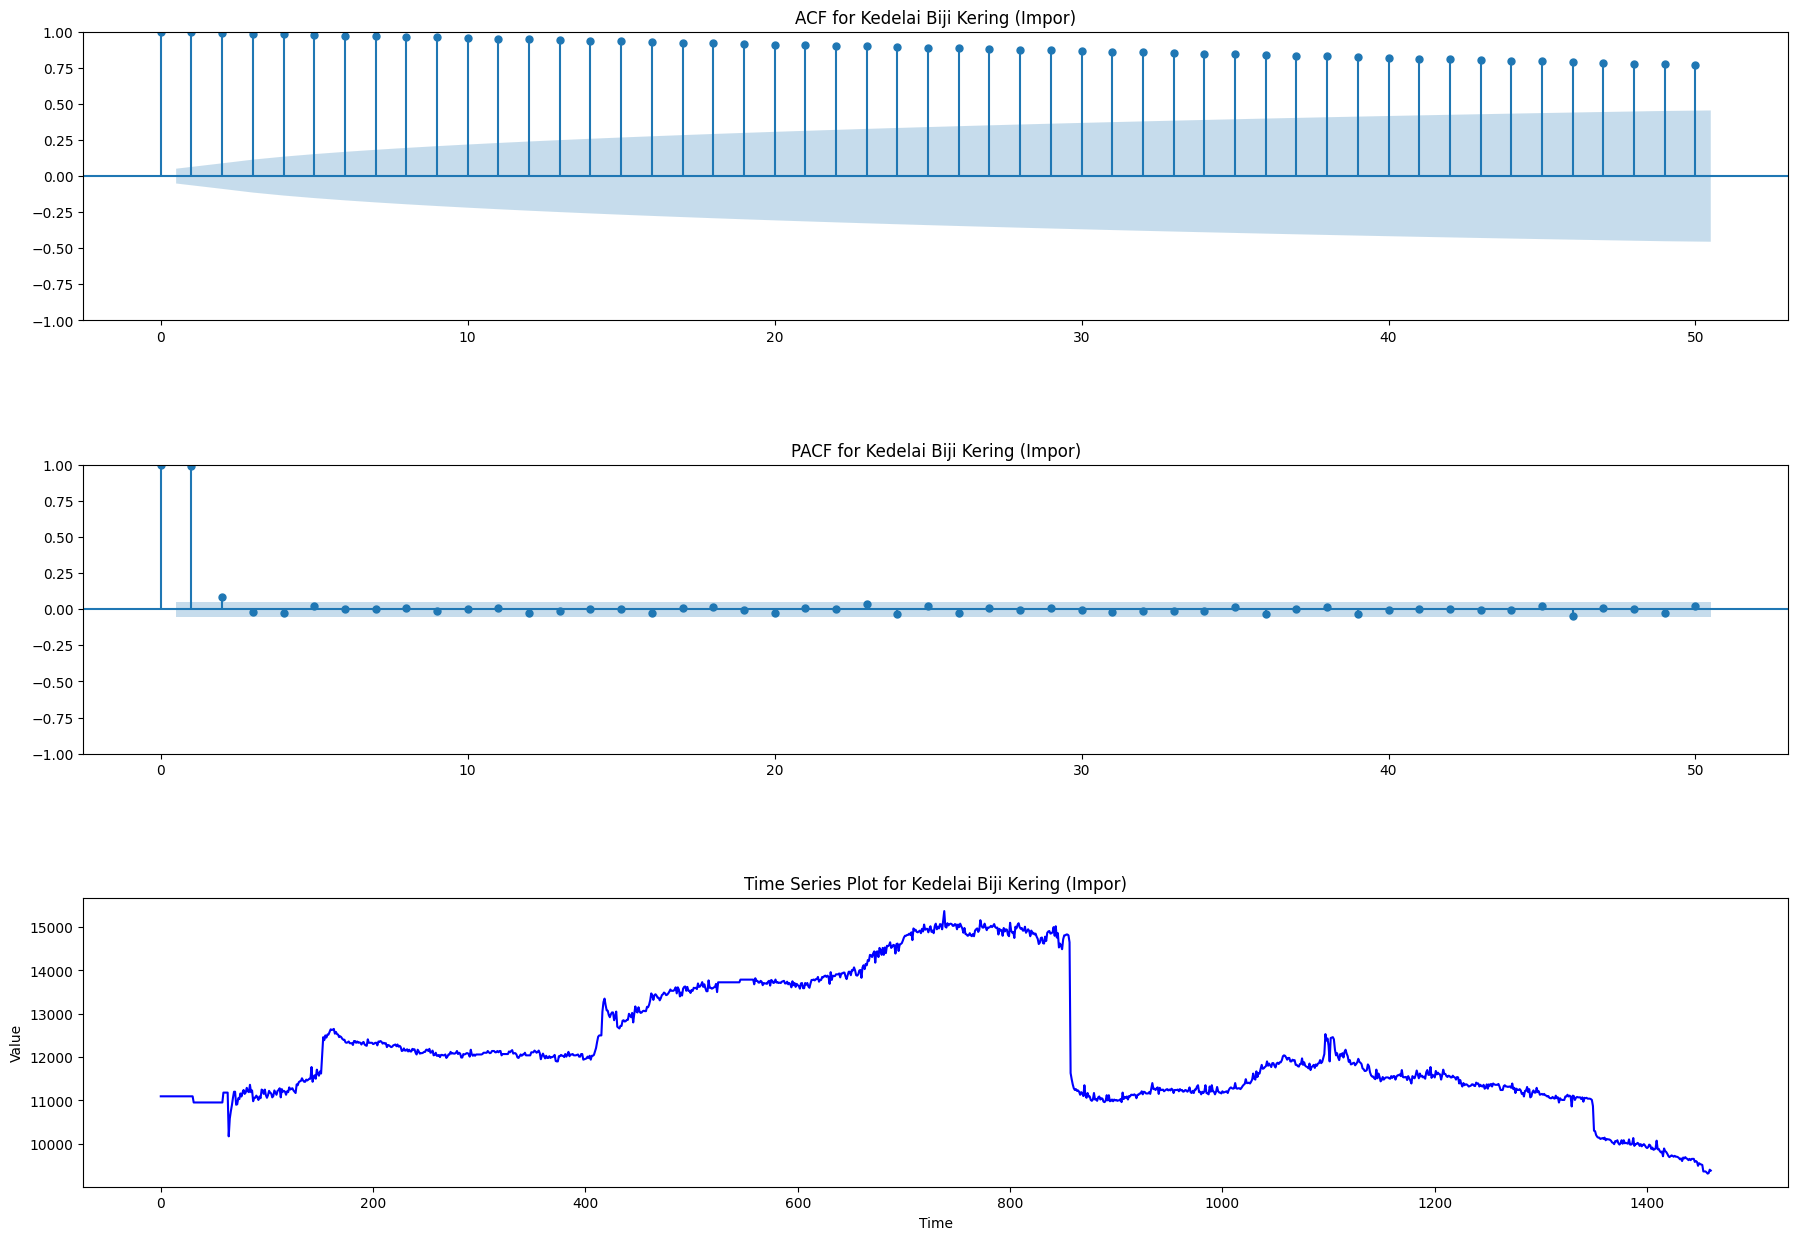

In [ ]:
target_columns = ['Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras', 'Bawang Merah',
                  'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Cabai Rawit Merah',
                  'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras',
                  'Kedelai Biji Kering (Impor)']

# Loop melalui setiap kolom target
for column in target_columns:
    print(f'Checking stationarity for {column}:\n')

    # ADF Test
    result = adfuller(df_merged[column], autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Menentukan apakah stasioner berdasarkan p-value
    if result[1] < 0.05:
        print(f'\n{column} is stationary (p-value < 0.05)\n')
    else:
        print(f'\n{column} is not stationary (p-value >= 0.05)\n')

    # Plot ACF, PACF, dan Time Series
    fig, axes = plt.subplots(3, 1, figsize=(22, 15))
    plt.subplots_adjust(hspace=0.5)  # Adjust space between subplots

    # Plot ACF dan PACF
    plot_acf(df_merged[column], lags=50, ax=axes[0])
    plot_pacf(df_merged[column], lags=50, ax=axes[1])
    axes[0].set_title(f'ACF for {column}')
    axes[1].set_title(f'PACF for {column}')

    # Plot time series
    df_merged[column].plot(ax=axes[2], color='blue')
    axes[2].set_title(f'Time Series Plot for {column}')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('Value')

    plt.show()

## Anlisis Musiman dan Tren

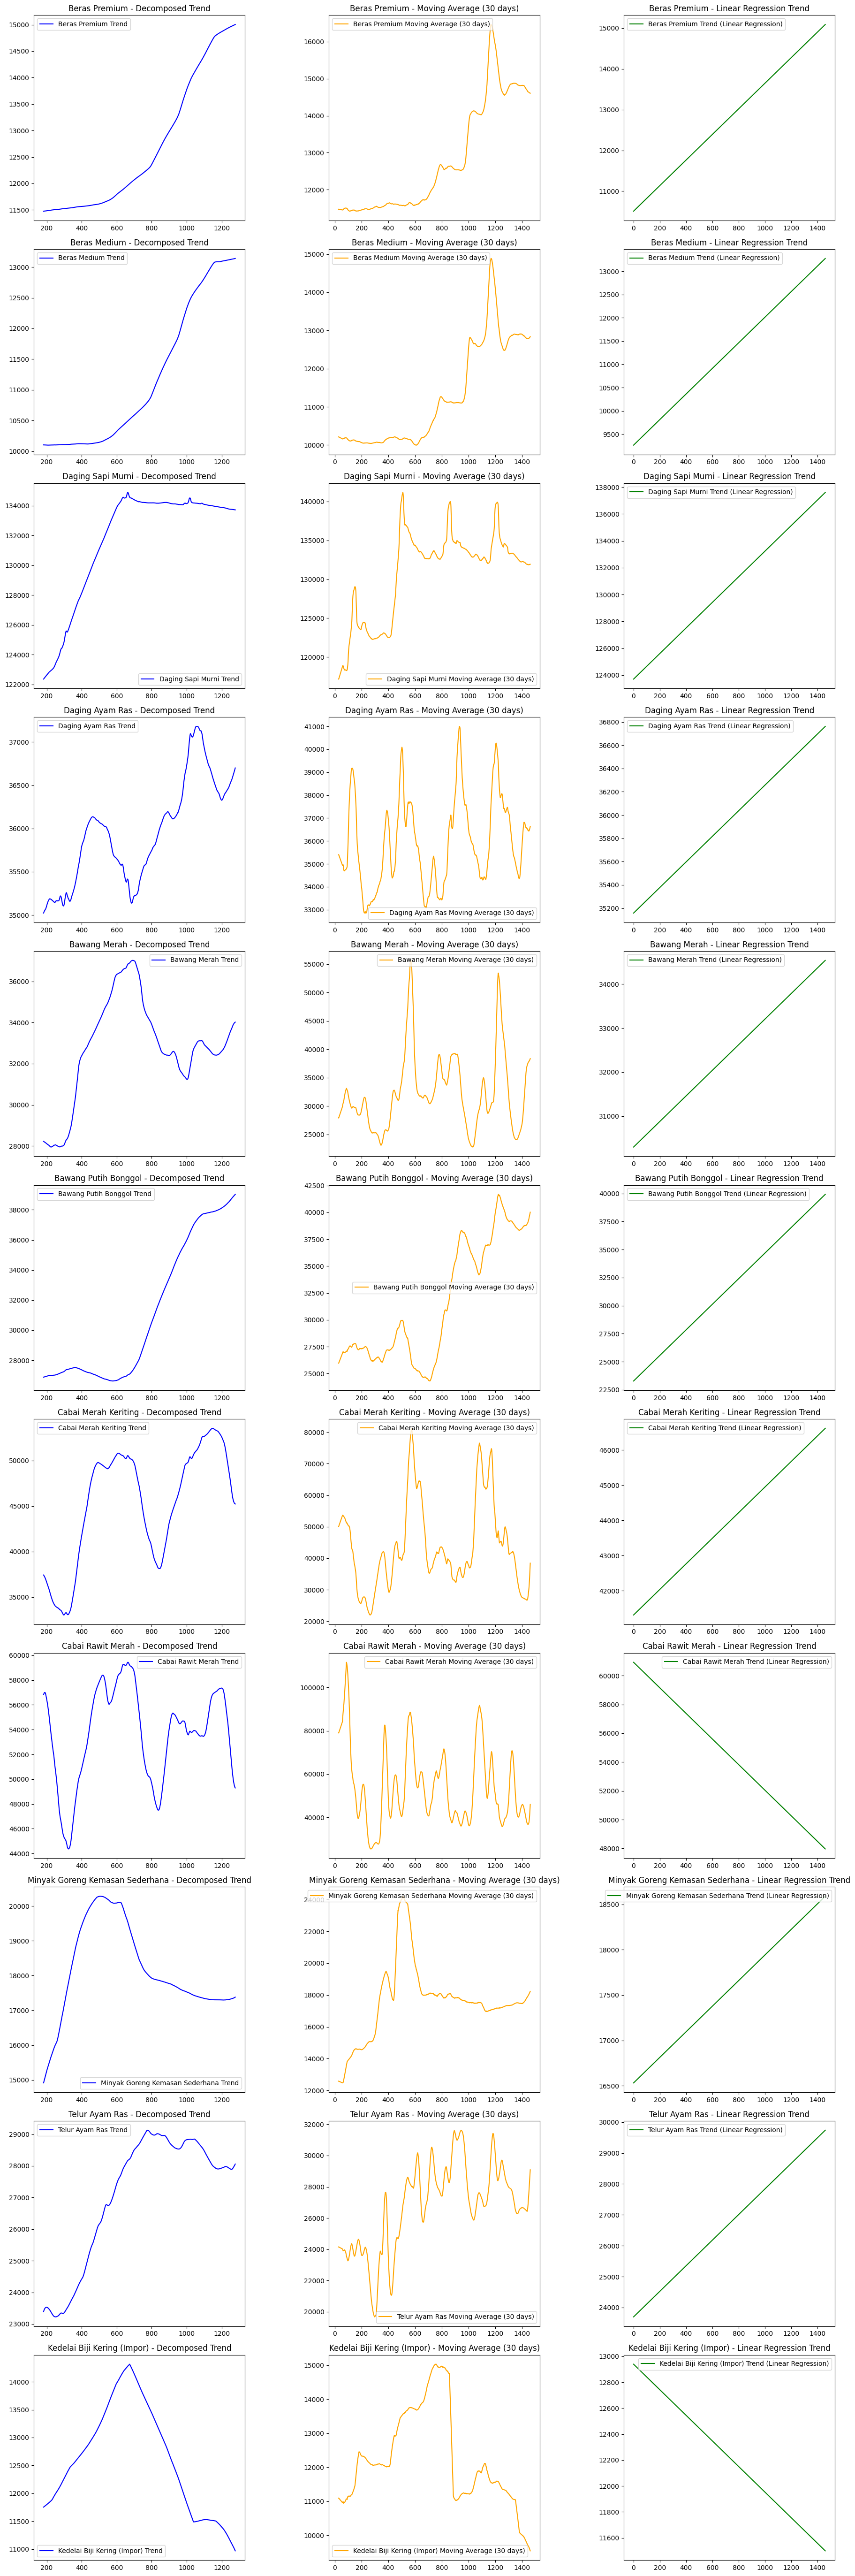

In [ ]:
# Pastikan target_columns sesuai dengan kolom dalam DataFrame
target_columns = [
    'Beras Premium', 'Beras Medium', 'Daging Sapi Murni',
    'Daging Ayam Ras', 'Bawang Merah', 'Bawang Putih Bonggol',
    'Cabai Merah Keriting', 'Cabai Rawit Merah',
    'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras',
    'Kedelai Biji Kering (Impor)'
]

# Set up subplots
fig, axes = plt.subplots(len(target_columns), 3, figsize=(18, len(target_columns) * 5))

# Loop untuk setiap kolom target
for i, column_name in enumerate(target_columns):
    # Ambil data seri waktu
    series = df_merged[column_name]

    # Lakukan decomposing (dengan asumsi musiman 365 hari)
    result = seasonal_decompose(series, model='additive', period=365)

    # Plot hasil decomposing: Tren
    axes[i, 0].plot(result.trend, label=f'{column_name} Trend', color='blue')
    axes[i, 0].set_title(f"{column_name} - Decomposed Trend")
    axes[i, 0].legend()

    # Plot moving average
    moving_avg = series.rolling(window=30).mean()  # 30 hari rata-rata bergerak
    axes[i, 1].plot(moving_avg, label=f'{column_name} Moving Average (30 days)', color='orange')
    axes[i, 1].set_title(f"{column_name} - Moving Average (30 days)")
    axes[i, 1].legend()

    # Plot trend fitted by linear regression
    X = np.reshape(np.arange(len(series)), (len(series), 1))  # Waktu sebagai variabel prediktor
    y = series.values  # Data harga sebagai target
    model = LinearRegression()
    model.fit(X, y)

    # Hitung tren dari regresi linear
    trend = model.predict(X)
    axes[i, 2].plot(trend, label=f'{column_name} Trend (Linear Regression)', color='green')
    axes[i, 2].set_title(f"{column_name} - Linear Regression Trend")
    axes[i, 2].legend()

plt.tight_layout()
plt.show()

# Modelling

In [ ]:
# Tentukan persentase data yang akan digunakan untuk data pelatihan (misalnya, 80%)
train_percentage = 0.8

# Hitung indeks yang memisahkan data pelatihan dan data pengujian
split_index = int(len(df_merged) * train_percentage)

# Bagi data menjadi data pelatihan dan data pengujian
train_data = df_merged[:split_index]
test_data = df_merged[split_index:]

print("Jumlah data train:" , len(train_data))
print("Jumlah data test:" , len(test_data))

Jumlah data train: 1168
Jumlah data test: 293


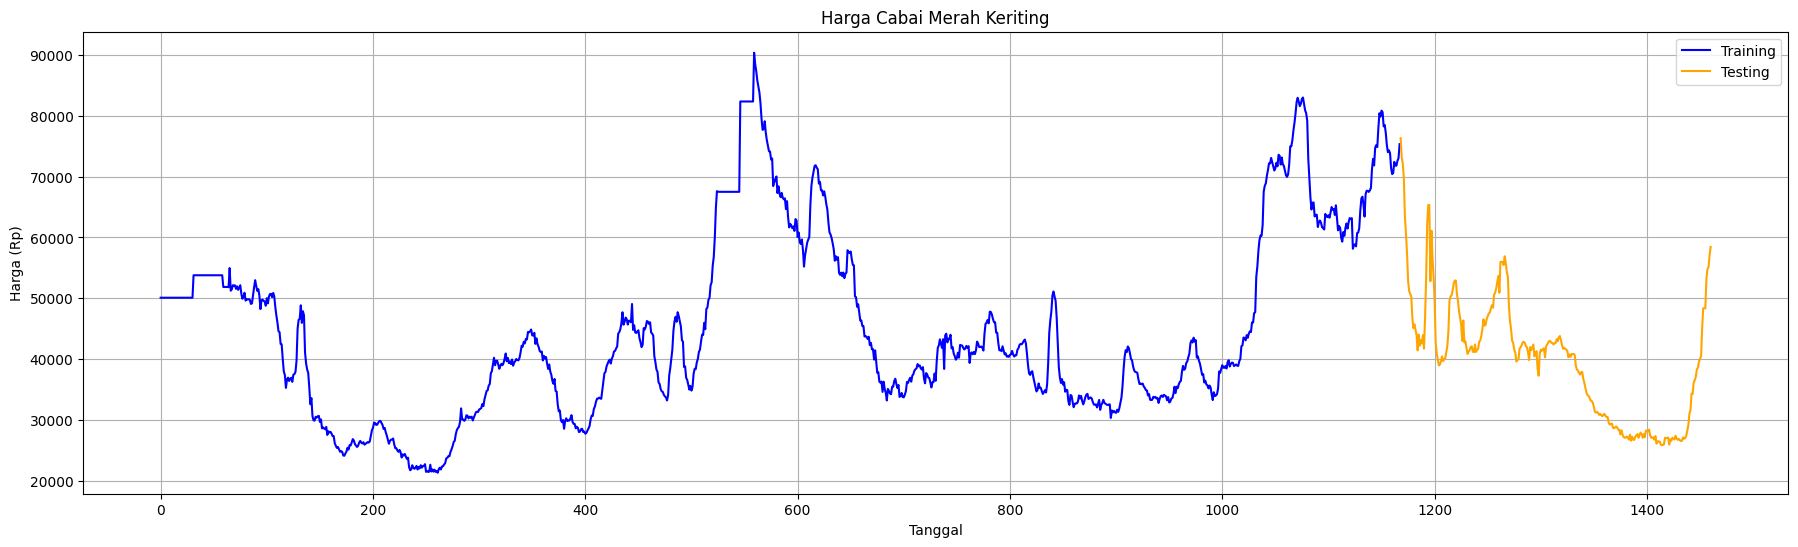

In [ ]:
plt.figure(figsize=(22, 6))

# Plot df_training in blue
plt.plot(train_data.index, train_data['Cabai Merah Keriting'], label='Training', color='blue')

# Plot df_test in orange
plt.plot(test_data.index, test_data['Cabai Merah Keriting'], label='Testing', color='orange')

# Tambahkan judul dan label
plt.title('Harga Cabai Merah Keriting')

plt.legend(loc='upper right')  # Tambahkan legend
plt.xlabel('Tanggal')
plt.ylabel('Harga (Rp)')
plt.grid(True)
plt.show()

### Exponential Smooting

Modeling untuk kolom: Beras Premium


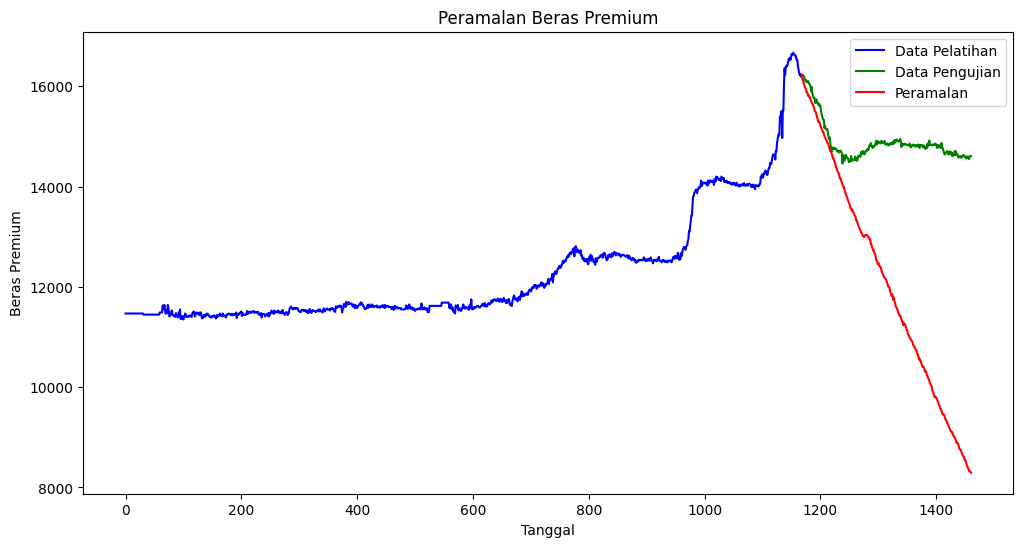

Modeling untuk kolom: Beras Medium


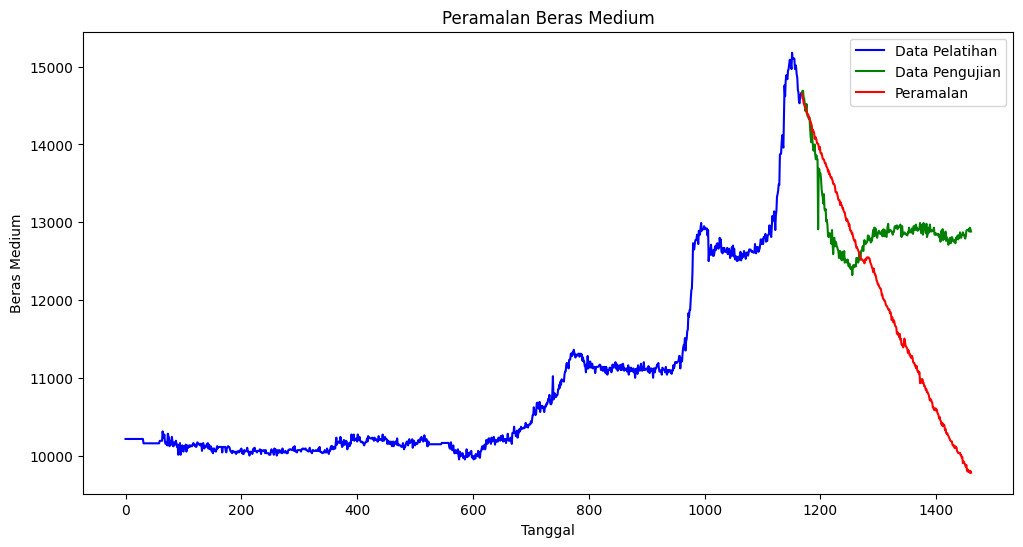

Modeling untuk kolom: Daging Sapi Murni


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



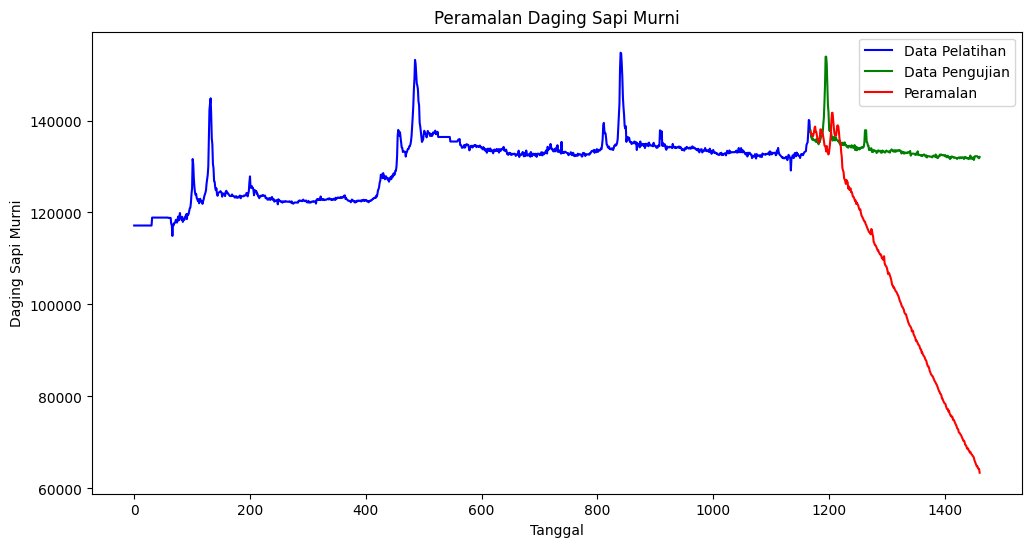

Modeling untuk kolom: Daging Ayam Ras


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



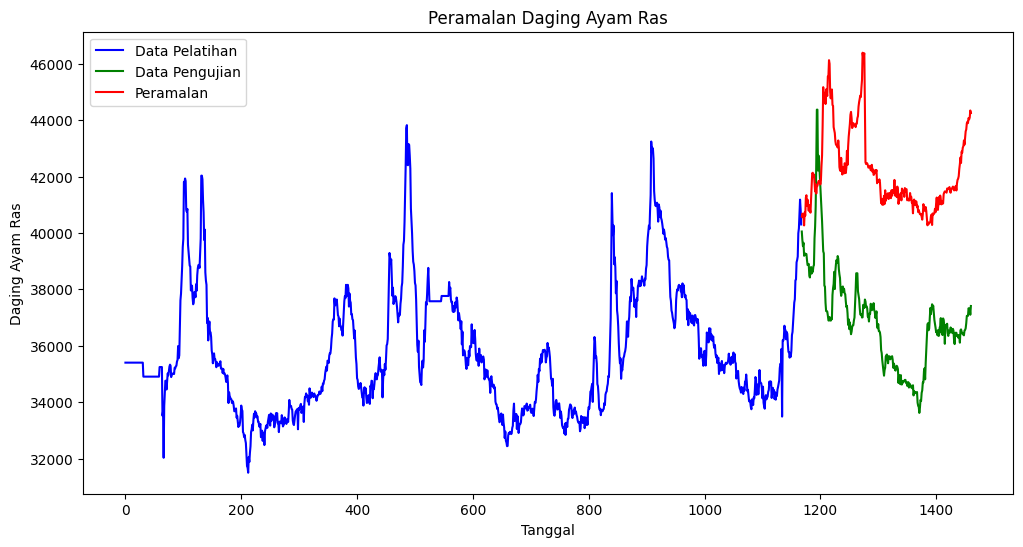

Modeling untuk kolom: Bawang Merah


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



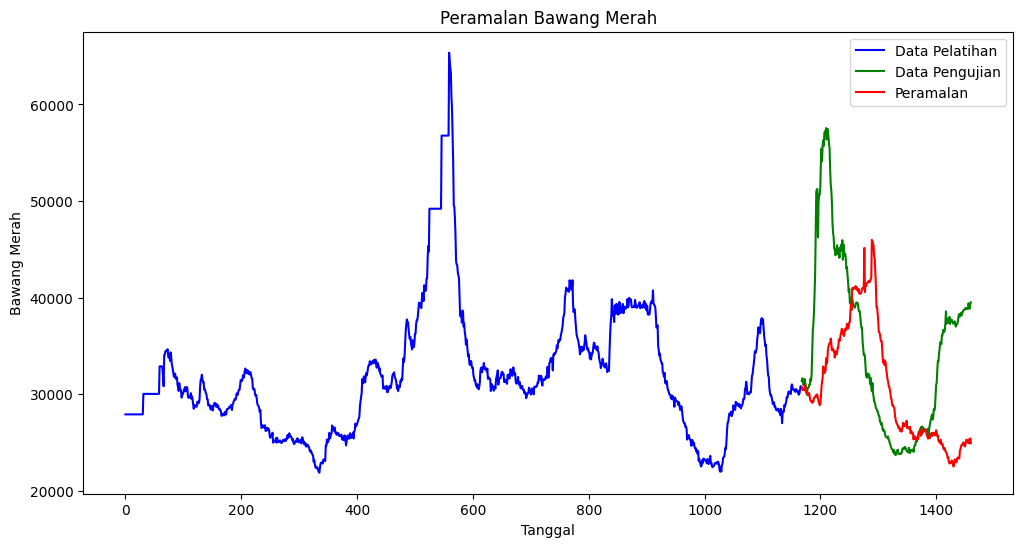

Modeling untuk kolom: Bawang Putih Bonggol


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



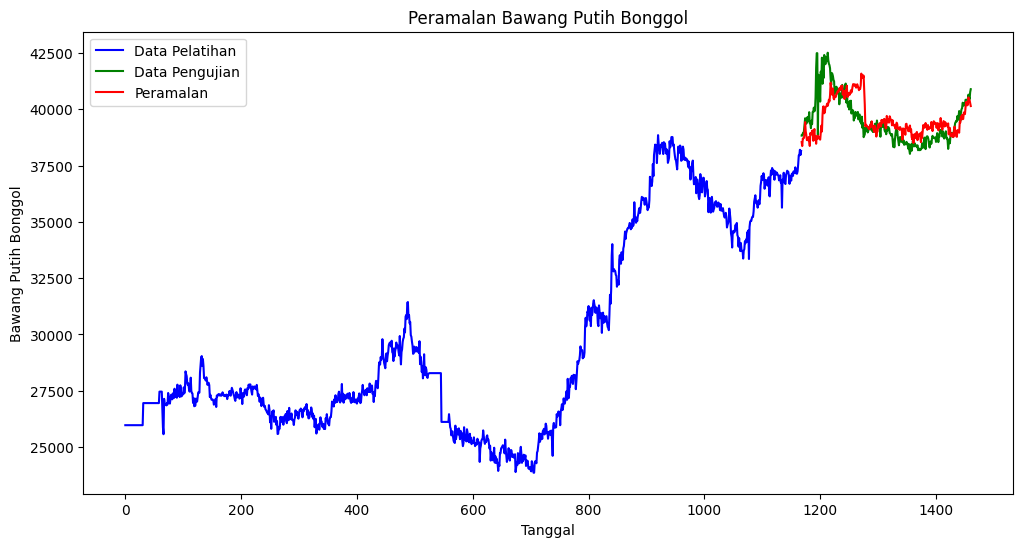

Modeling untuk kolom: Cabai Merah Keriting


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



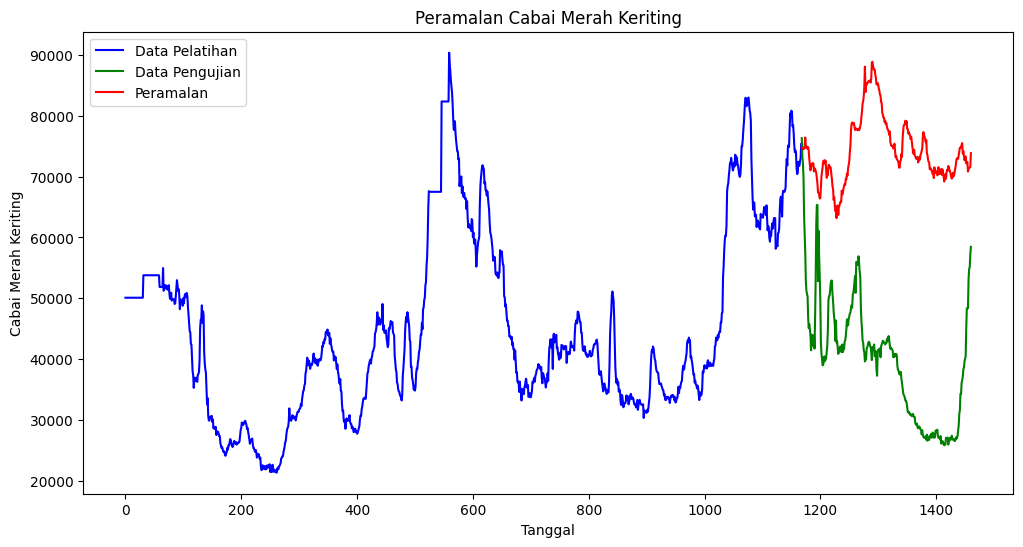

Modeling untuk kolom: Cabai Rawit Merah


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



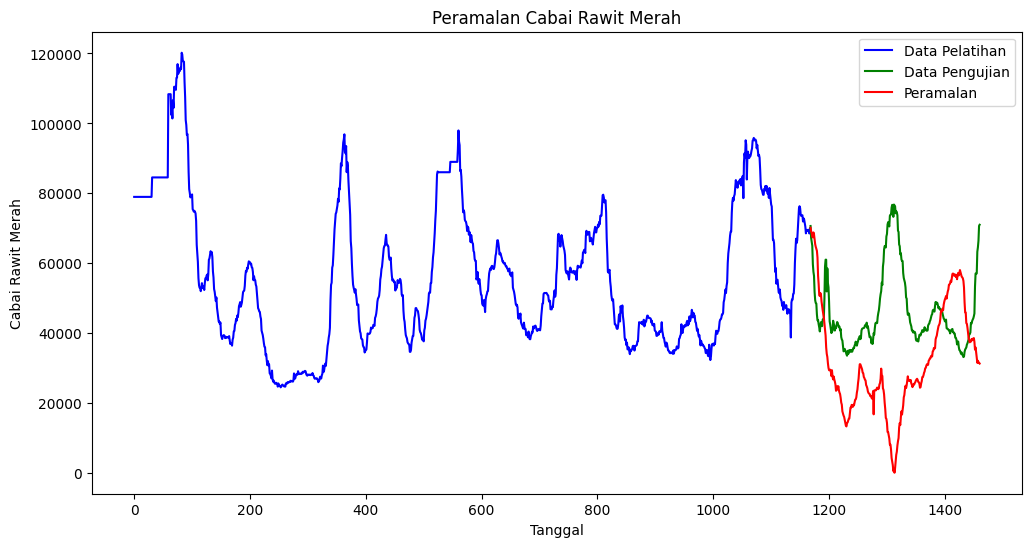

Modeling untuk kolom: Minyak Goreng Kemasan Sederhana


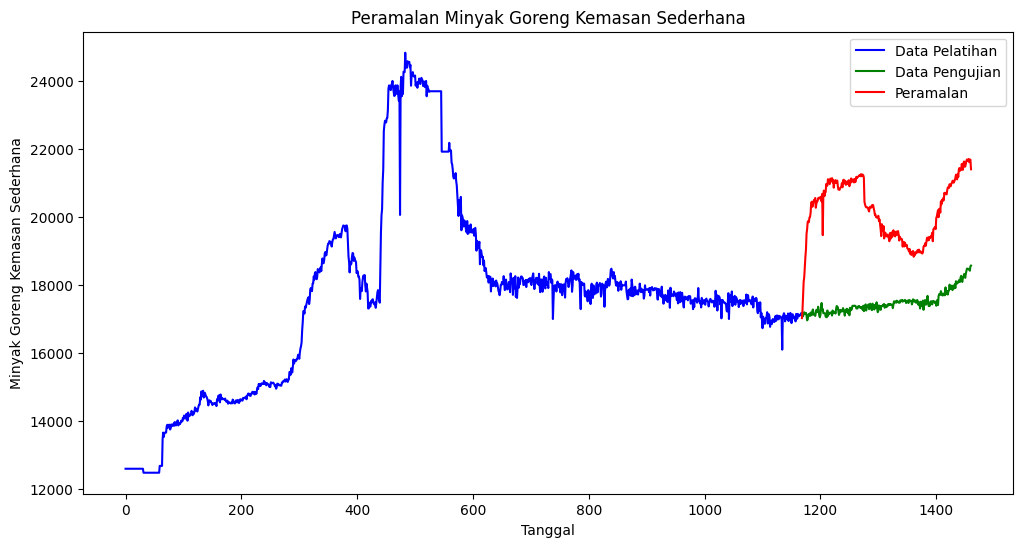

Modeling untuk kolom: Telur Ayam Ras


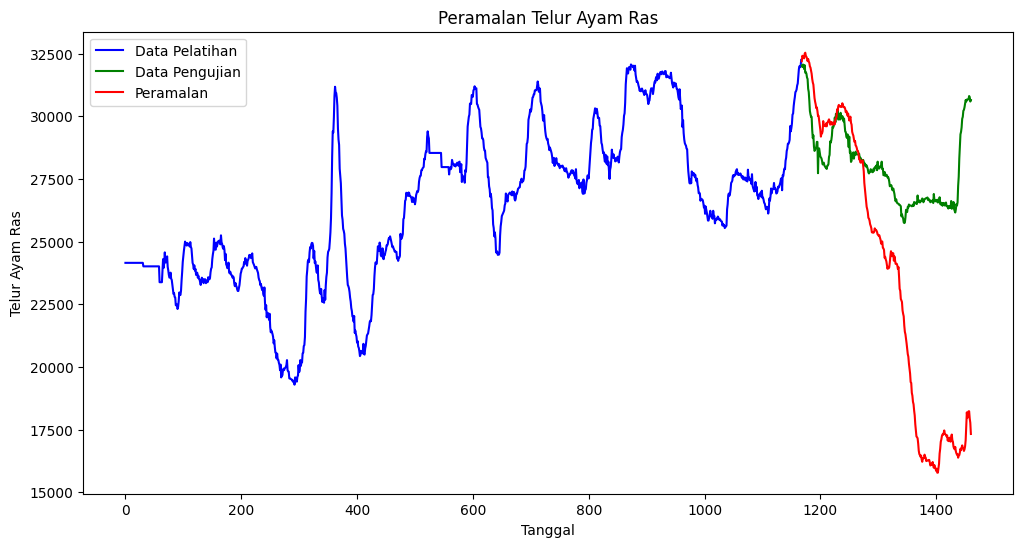

Modeling untuk kolom: Kedelai Biji Kering (Impor)


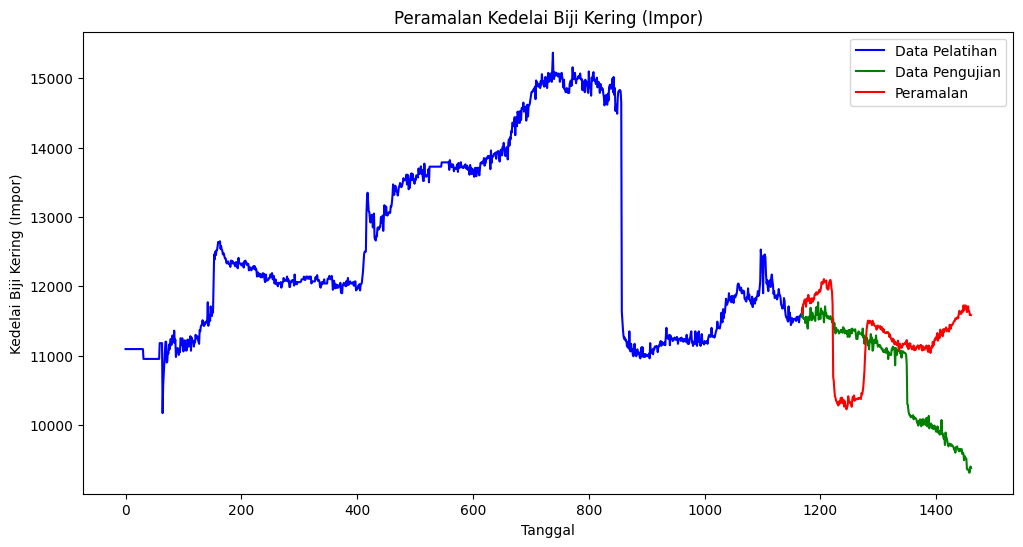

Model: Beras Premium, RMSE: 3472.747492844333, MAE: 2805.869030683476
Model: Beras Medium, RMSE: 1572.6895683517992, MAE: 1257.7247738302017
Model: Daging Sapi Murni, RMSE: 37704.85202624425, MAE: 31138.16936859458
Model: Daging Ayam Ras, RMSE: 5614.458933710987, MAE: 5313.36085409623
Model: Bawang Merah, RMSE: 10501.398732719406, MAE: 8147.038387508014
Model: Bawang Putih Bonggol, RMSE: 951.9774064999231, MAE: 682.3226321330534
Model: Cabai Merah Keriting, RMSE: 36288.69723678092, MAE: 34586.40283570337
Model: Cabai Rawit Merah, RMSE: 25682.786487843678, MAE: 19977.795029742076
Model: Minyak Goreng Kemasan Sederhana, RMSE: 2866.272547196075, MAE: 2737.485336403688
Model: Telur Ayam Ras, RMSE: 6536.5031762463805, MAE: 4881.774683584563
Model: Kedelai Biji Kering (Impor), RMSE: 1052.7904592789332, MAE: 852.5943341104055


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk model Eksponensial Smoothing
def model_exponential(train_data, test_data, column_name, seasonal_periods=365):
    # Membaca data target dari data pelatihan
    train_column = train_data[column_name]

    # Membuat model Eksponensial Smoothing
    model = ExponentialSmoothing(train_column, trend='add', seasonal='add', seasonal_periods=seasonal_periods)

    # Menyesuaikan model dengan data pelatihan
    model_fit = model.fit()

    # Melakukan peramalan
    forecast_test = abs(model_fit.forecast(steps=len(test_data)))

    # Evaluasi hasil peramalan
    rmse = np.sqrt(mean_squared_error(test_data[column_name], forecast_test))
    mae = mean_absolute_error(test_data[column_name], forecast_test)

    # Menyimpan hasil evaluasi ke dalam dictionary
    evaluation_results = {
        'RMSE': rmse,
        'MAE': mae,
    }

    # Plot hasil peramalan
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_column, label='Data Pelatihan', color='blue')
    plt.plot(test_data.index, test_data[column_name], label='Data Pengujian', color='green')
    plt.plot(test_data.index, forecast_test, label='Peramalan', color='red')
    plt.title(f'Peramalan {column_name}')
    plt.xlabel('Tanggal')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

    return evaluation_results

# Contoh penggunaan fungsi
results_dict = {}

target_columns = ['Beras Premium', 'Beras Medium', 'Daging Sapi Murni', 'Daging Ayam Ras', 'Bawang Merah',
                  'Bawang Putih Bonggol', 'Cabai Merah Keriting', 'Cabai Rawit Merah',
                  'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras', 'Kedelai Biji Kering (Impor)']

# Loop untuk semua kolom target
for target in target_columns:
    print(f'Modeling untuk kolom: {target}')
    results_dict[target] = model_exponential(train_data, test_data, target, seasonal_periods=365)

# Print hasil evaluasi
for key, value in results_dict.items():
    print(f'Model: {key}, RMSE: {value["RMSE"]}, MAE: {value["MAE"]}')

In [ ]:
# Convert dictionary to DataFrame
results_df = pd.DataFrame(results_dict).T

# Print the DataFrame
results_df

RMSE           MAE
Beras Premium                     3472.747493   2805.869031
Beras Medium                      1572.689568   1257.724774
Daging Sapi Murni                37704.852026  31138.169369
Daging Ayam Ras                   5614.458934   5313.360854
Bawang Merah                     10501.398733   8147.038388
Bawang Putih Bonggol               951.977406    682.322632
Cabai Merah Keriting             36288.697237  34586.402836
Cabai Rawit Merah                25682.786488  19977.795030
Minyak Goreng Kemasan Sederhana   2866.272547   2737.485336
Telur Ayam Ras                    6536.503176   4881.774684
Kedelai Biji Kering (Impor)       1052.790459    852.594334

## Random Forest

In [ ]:
# Membuat lag 1 dan lag 2
for lag in range(1, 3):  # Untuk lag 1 dan 2
    train_data[f'lag_{lag}'] = train_data['Daging Ayam Ras'].shift(lag)
    test_data[f'lag_{lag}'] = test_data['Daging Ayam Ras'].shift(lag)

# Menghapus baris yang memiliki NaN pada kolom lag
train_data.dropna(subset=['lag_1', 'lag_2'], inplace=True)
test_data.dropna(subset=['lag_1', 'lag_2'], inplace=True)

<ipython-input-42-f0659b856606>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-f0659b856606>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-f0659b856606>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-f0659b8

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Model Random Forest
def model_rf(train_data, test_data, column_name):
    # Membuat kolom lag
    for lag in range(1, 3):
        train_data[f'lag_{lag}'] = train_data[column_name].shift(lag)
        test_data[f'lag_{lag}'] = test_data[column_name].shift(lag)

    # Menghapus baris yang memiliki NaN pada kolom lag
    train_data.dropna(subset=[f'lag_{lag}' for lag in range(1, 3)], inplace=True)
    test_data.dropna(subset=[f'lag_{lag}' for lag in range(1, 3)], inplace=True)

    # Fitur dan target
    X_train = train_data[['lag_1', 'lag_2']]
    y_train = train_data[column_name]
    X_test = test_data[['lag_1', 'lag_2']]
    y_test = test_data[column_name]

    # Model Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Peramalan
    forecast_test = model.predict(X_test)

    # Evaluasi hasil peramalan
    rmse = np.sqrt(mean_squared_error(y_test, forecast_test))
    mae = mean_absolute_error(y_test, forecast_test)

    # Menyimpan hasil evaluasi
    evaluation_results = {
        'RMSE': rmse,
        'MAE': mae,
    }

    # Plot hasil peramalan
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, y_train, label='Data Pelatihan', color='blue')
    plt.plot(test_data.index, y_test, label='Data Pengujian', color='green')
    plt.plot(test_data.index, forecast_test, label='Peramalan', color='red')
    plt.title(f'Peramalan {column_name}')
    plt.xlabel('Tanggal')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

    return evaluation_results

Modeling untuk kolom: Daging Ayam Ras


<ipython-input-43-992394c13646>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:15: SettingWithCopyWarning:


A value is trying

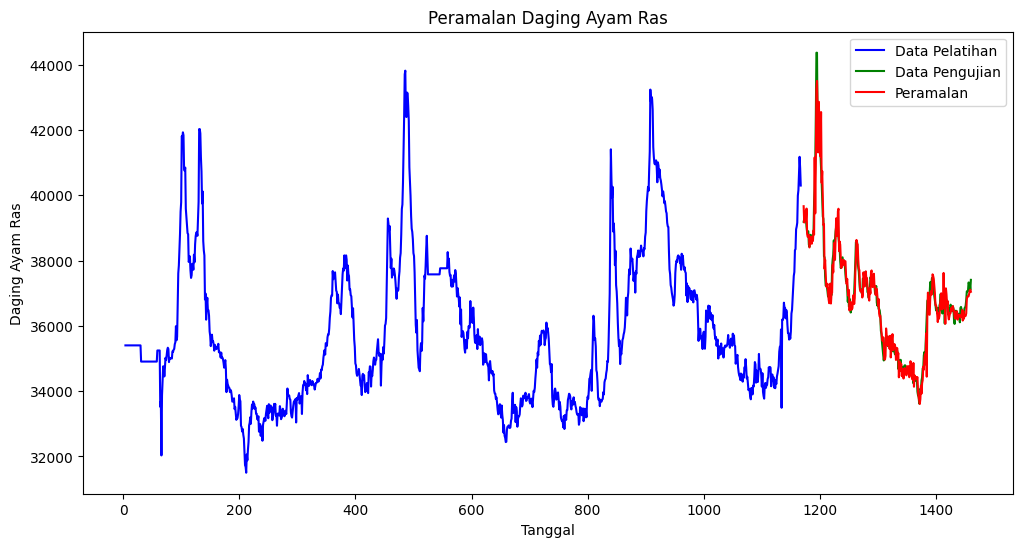

Modeling untuk kolom: Bawang Merah


<ipython-input-43-992394c13646>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:15: SettingWithCopyWarning:


A value is trying

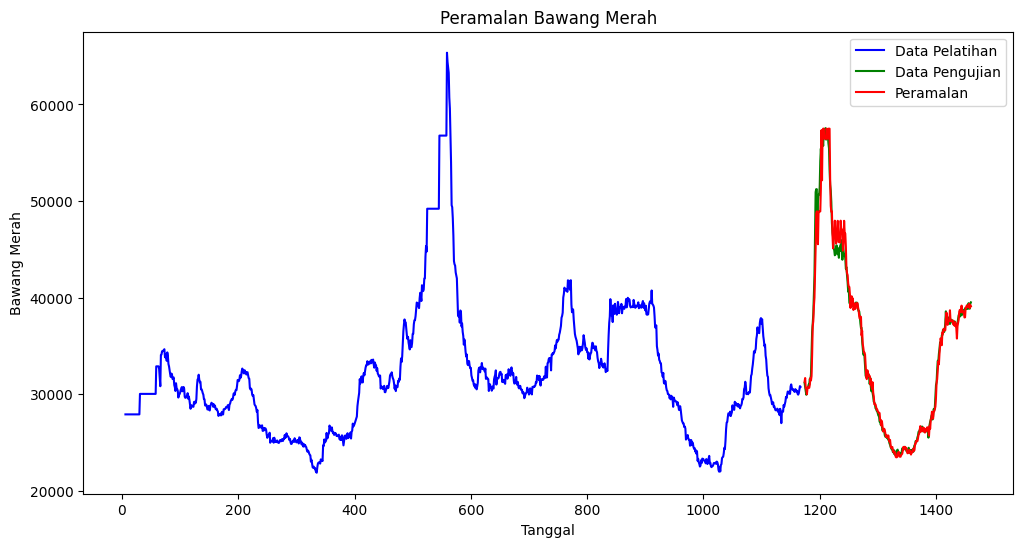

Modeling untuk kolom: Cabai Rawit Merah


<ipython-input-43-992394c13646>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:15: SettingWithCopyWarning:


A value is trying

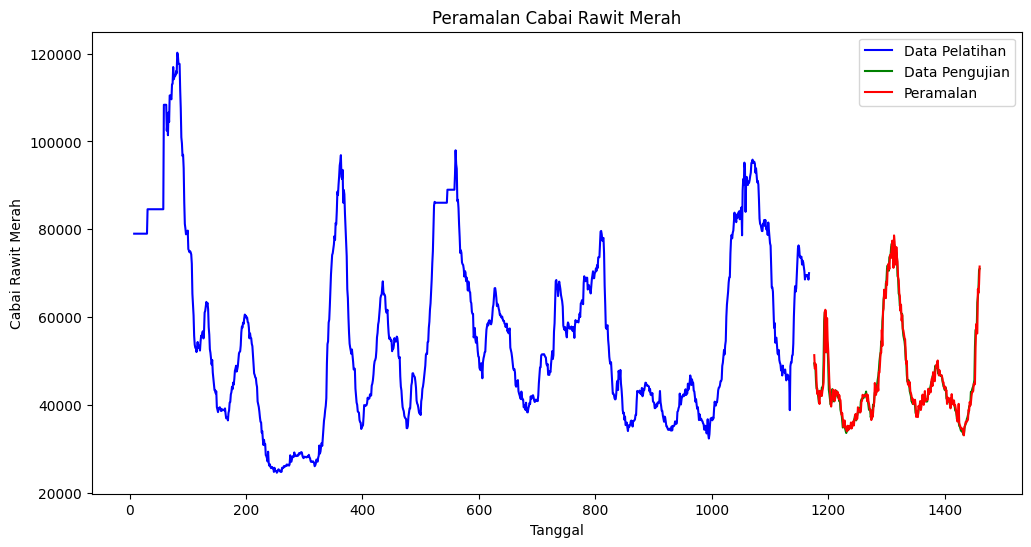

Modeling untuk kolom: Telur Ayam Ras


<ipython-input-43-992394c13646>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-992394c13646>:15: SettingWithCopyWarning:


A value is trying

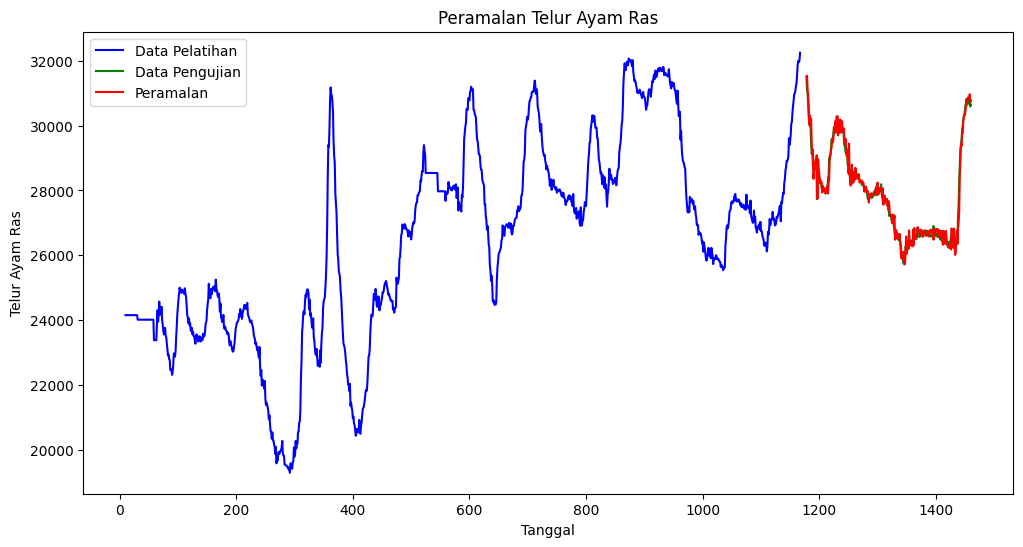

Model: Daging Ayam Ras, RMSE: 376.50582050231355, MAE: 264.461935237437
Model: Bawang Merah, RMSE: 1143.2310429785591, MAE: 688.1183445685292
Model: Cabai Rawit Merah, RMSE: 1791.498584161492, MAE: 1151.9901754385962
Model: Telur Ayam Ras, RMSE: 239.10696361430897, MAE: 170.25443573554566


In [ ]:
target_columns = ['Daging Ayam Ras', 'Bawang Merah', 'Cabai Rawit Merah', 'Telur Ayam Ras']

# Dictionary untuk menyimpan hasil evaluasi
results_dict_rf = {}

# Loop untuk semua kolom target
for target in target_columns:
    print(f'Modeling untuk kolom: {target}')
    results_dict_rf[target] = model_rf(train_data, test_data, target)

# Print hasil evaluasi
for key, value in results_dict_rf.items():
    print(f'Model: {key}, RMSE: {value["RMSE"]}, MAE: {value["MAE"]}')

## LSTM


In [ ]:
!pip install tensorflow

Modeling untuk kolom: Daging Ayam Ras


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step


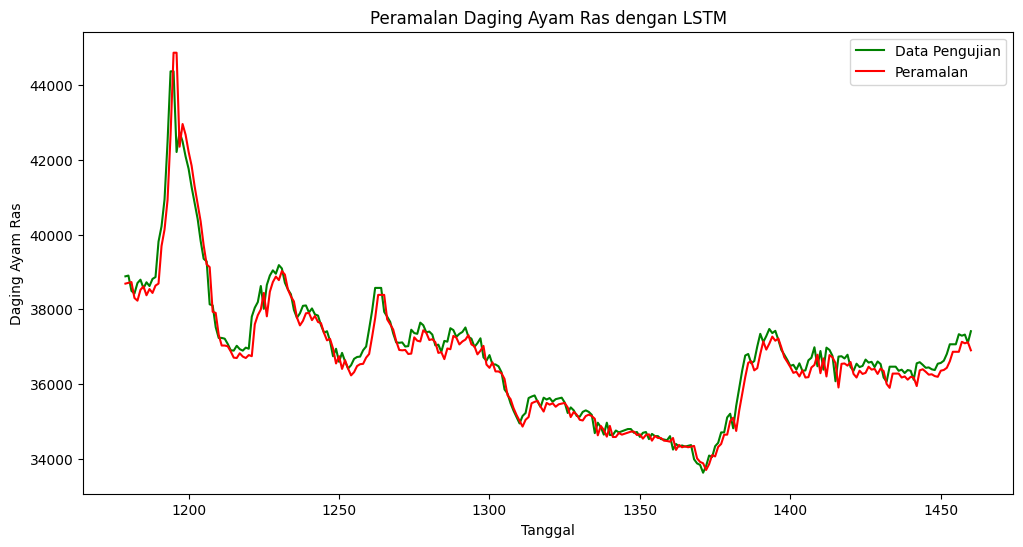

Modeling untuk kolom: Bawang Merah


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


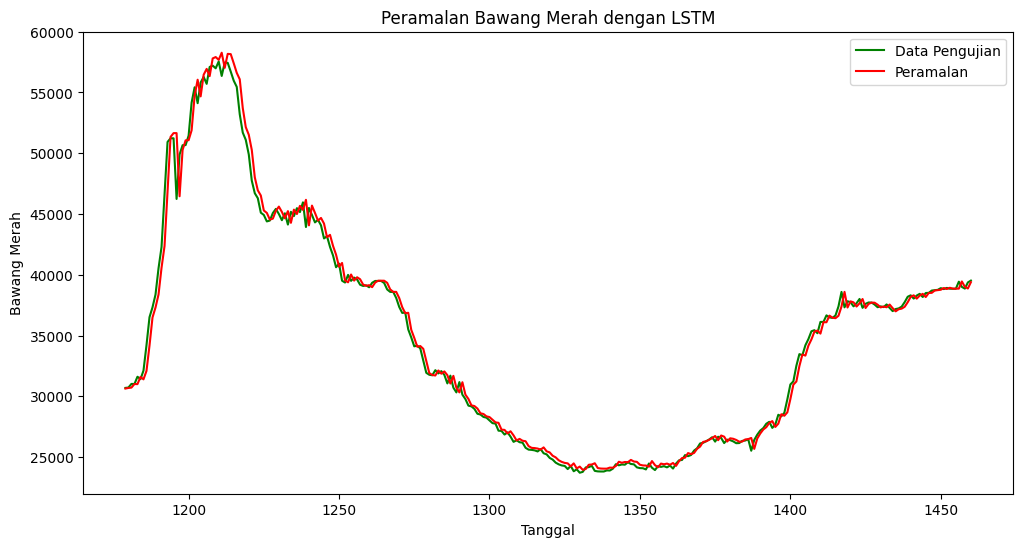

Modeling untuk kolom: Cabai Rawit Merah


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


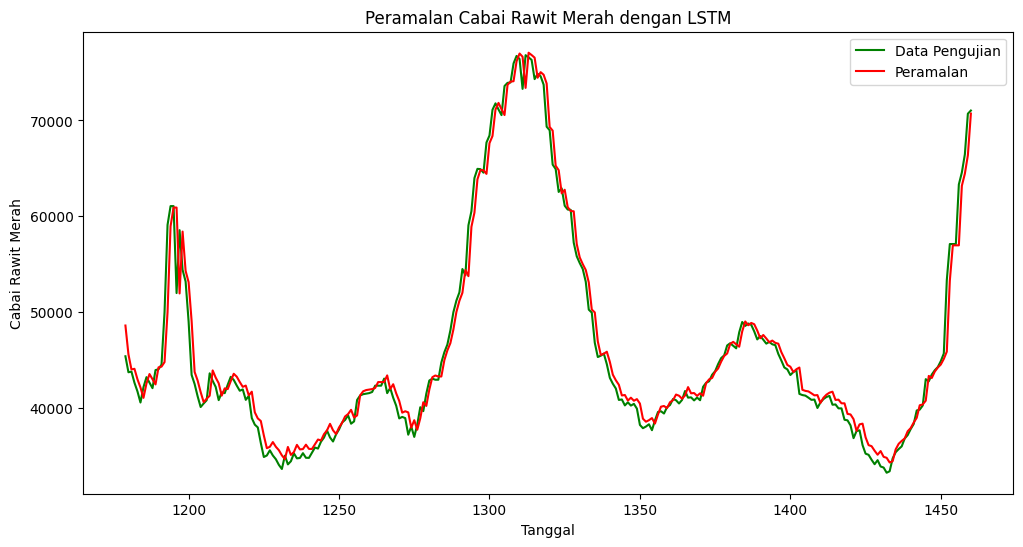

Modeling untuk kolom: Telur Ayam Ras


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


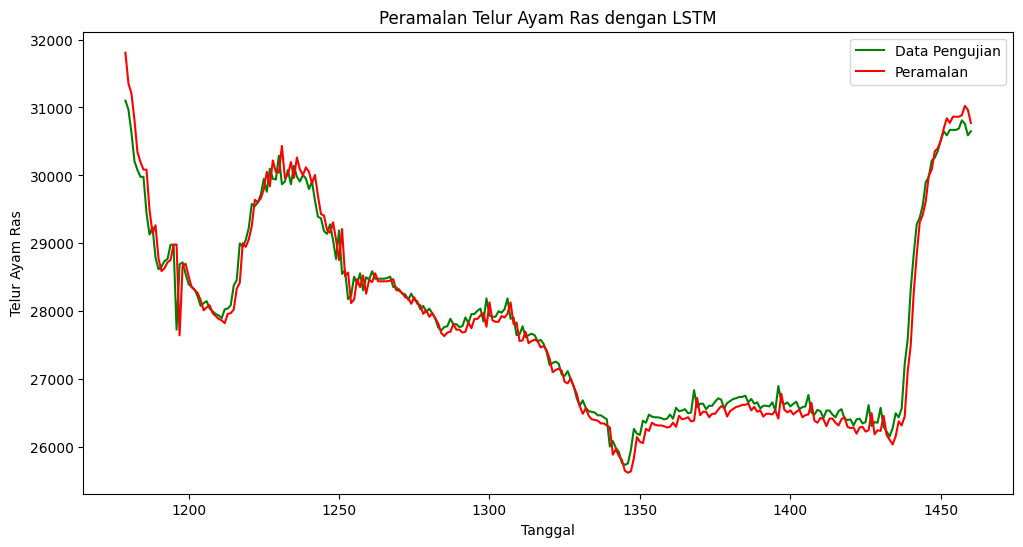

Model: Daging Ayam Ras, RMSE: 372.6830641683802, MAE: 253.77550144060282
Model: Bawang Merah, RMSE: 852.7995924138537, MAE: 521.4022398603726
Model: Cabai Rawit Merah, RMSE: 1739.5725817850098, MAE: 1116.154172207447
Model: Telur Ayam Ras, RMSE: 229.14688300536673, MAE: 160.36500581781894


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fungsi untuk membuat dataset dalam format time series
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

def model_lstm(train_data, test_data, column_name, look_back=1):
    # Normalisasi data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_column = train_data[column_name].values.reshape(-1, 1)
    test_column = test_data[column_name].values.reshape(-1, 1)

    # Skala data
    train_scaled = scaler.fit_transform(train_column)
    test_scaled = scaler.transform(test_column)

    # Membuat dataset time series
    X_train, y_train = create_dataset(train_scaled, look_back)
    X_test, y_test = create_dataset(test_scaled, look_back)

    # Reshape untuk input LSTM: [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Membuat model LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))

    # Kompilasi dan latih model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Melakukan peramalan
    forecast_test = model.predict(X_test)

    # Inversi skala prediksi
    forecast_test = scaler.inverse_transform(forecast_test)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Evaluasi hasil peramalan
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, forecast_test))
    mae = mean_absolute_error(y_test_rescaled, forecast_test)

    # Menyimpan hasil evaluasi
    evaluation_results = {
        'RMSE': rmse,
        'MAE': mae,
    }

    # Plot hasil peramalan
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index[look_back:], y_test_rescaled, label='Data Pengujian', color='green')
    plt.plot(test_data.index[look_back:], forecast_test, label='Peramalan', color='red')
    plt.title(f'Peramalan {column_name} dengan LSTM')
    plt.xlabel('Tanggal')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

    return evaluation_results

# Kolom target yang akan diproses
target_columns = ['Daging Ayam Ras', 'Bawang Merah', 'Cabai Rawit Merah', 'Telur Ayam Ras']

# Dictionary untuk menyimpan hasil evaluasi
results_dict_lstm = {}

# Loop untuk semua kolom target
for target in target_columns:
    print(f'Modeling untuk kolom: {target}')
    results_dict_lstm[target] = model_lstm(train_data, test_data, target)

# Print hasil evaluasi
for key, value in results_dict_lstm.items():
    print(f'Model: {key}, RMSE: {value["RMSE"]}, MAE: {value["MAE"]}')

# Forcasting

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import os

# Fungsi untuk menyiapkan data untuk LSTM
def prepare_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])  # Fitur (time_steps)
        y.append(data[i + time_steps, 0])      # Target
    return np.array(X), np.array(y)

# Fungsi untuk membuat dan menyimpan model LSTM ke dalam file pickle
def save_model_to_pickle(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Fungsi untuk membuat dan melatih model LSTM
def train_lstm_model(train_data, column_name, time_steps=10):
    # Menyiapkan data untuk LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data[column_name].values.reshape(-1, 1))

    X_train, y_train = prepare_data(train_data_scaled, time_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Menyesuaikan bentuk data untuk LSTM

    # Membangun model LSTM
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Melatih model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

    # Menyimpan model ke file pickle
    model_filename = os.path.join(model_folder, column_name + '_lstm_model.pkl')
    save_model_to_pickle(model, model_filename)

    return model, scaler

# Kolom yang ingin dievaluasi
columns_to_evaluate = ['Daging Ayam Ras', 'Bawang Merah', 'Cabai Rawit Merah', 'Telur Ayam Ras']

# Inisialisasi folder untuk menyimpan model
model_folder = model_folder_path + '/'
os.makedirs(model_folder, exist_ok=True)

# Melatih model LSTM untuk setiap kolom dan menyimpannya
for col in columns_to_evaluate:
    print(f'Modeling untuk kolom: {col}')
    model, scaler = train_lstm_model(train_data, col, time_steps=10)
    print(f'Model untuk {col} berhasil dilatih dan disimpan.')

# Menyimpan folder path untuk model
model_folder_path = '/content/drive/My Drive/1. Tampung Bay 2/Tugas BIG DATA/Tugas Akhir/Data/modelling'


Modeling untuk kolom: Daging Ayam Ras
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



36/36 - 5s - 140ms/step - loss: 0.0420
Epoch 2/20
36/36 - 1s - 28ms/step - loss: 0.0071
Epoch 3/20
36/36 - 1s - 15ms/step - loss: 0.0054
Epoch 4/20
36/36 - 0s - 11ms/step - loss: 0.0050
Epoch 5/20
36/36 - 0s - 12ms/step - loss: 0.0047
Epoch 6/20
36/36 - 0s - 11ms/step - loss: 0.0045
Epoch 7/20
36/36 - 1s - 18ms/step - loss: 0.0039
Epoch 8/20
36/36 - 1s - 18ms/step - loss: 0.0034
Epoch 9/20
36/36 - 1s - 19ms/step - loss: 0.0029
Epoch 10/20
36/36 - 1s - 16ms/step - loss: 0.0025
Epoch 11/20
36/36 - 1s - 14ms/step - loss: 0.0023
Epoch 12/20
36/36 - 0s - 10ms/step - loss: 0.0022
Epoch 13/20
36/36 - 1s - 18ms/step - loss: 0.0021
Epoch 14/20
36/36 - 0s - 14ms/step - loss: 0.0021
Epoch 15/20
36/36 - 1s - 18ms/step - loss: 0.0019
Epoch 16/20
36/36 - 1s - 15ms/step - loss: 0.0019
Epoch 17/20
36/36 - 1s - 19ms/step - loss: 0.0019
Epoch 18/20
36/36 - 1s - 18ms/step - loss: 0.0018
Epoch 19/20
36/36 - 1s - 18ms/step - loss: 0.0018
Epoch 20/20
36/36 - 1s - 16ms/step - loss: 0.0017
Model untuk Daging 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
36/36 - 6s - 166ms/step - loss: 0.0233
Epoch 2/20
36/36 - 1s - 21ms/step - loss: 0.0026
Epoch 3/20
36/36 - 1s - 15ms/step - loss: 0.0016
Epoch 4/20
36/36 - 1s - 21ms/step - loss: 0.0015
Epoch 5/20
36/36 - 1s - 17ms/step - loss: 0.0014
Epoch 6/20
36/36 - 1s - 30ms/step - loss: 0.0013
Epoch 7/20
36/36 - 0s - 9ms/step - loss: 0.0013
Epoch 8/20
36/36 - 0s - 9ms/step - loss: 0.0012
Epoch 9/20
36/36 - 1s - 19ms/step - loss: 0.0012
Epoch 10/20
36/36 - 1s - 21ms/step - loss: 0.0011
Epoch 11/20
36/36 - 1s - 15ms/step - loss: 9.8554e-04
Epoch 12/20
36/36 - 0s - 12ms/step - loss: 9.2269e-04
Epoch 13/20
36/36 - 1s - 22ms/step - loss: 8.7704e-04
Epoch 14/20
36/36 - 1s - 35ms/step - loss: 8.2473e-04
Epoch 15/20
36/36 - 1s - 31ms/step - loss: 7.3155e-04
Epoch 16/20
36/36 - 1s - 16ms/step - loss: 7.3713e-04
Epoch 17/20
36/36 - 1s - 19ms/step - loss: 6.6457e-04
Epoch 18/20
36/36 - 1s - 30ms/step - loss: 6.3426e-04
Epoch 19/20
36/36 - 1s - 19ms/step - loss: 5.7180e-04
Epoch 20/20
36/36 - 1s -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



36/36 - 5s - 140ms/step - loss: 0.0408
Epoch 2/20
36/36 - 0s - 8ms/step - loss: 0.0050
Epoch 3/20
36/36 - 0s - 9ms/step - loss: 0.0034
Epoch 4/20
36/36 - 0s - 6ms/step - loss: 0.0033
Epoch 5/20
36/36 - 0s - 9ms/step - loss: 0.0031
Epoch 6/20
36/36 - 0s - 9ms/step - loss: 0.0029
Epoch 7/20
36/36 - 0s - 6ms/step - loss: 0.0027
Epoch 8/20
36/36 - 0s - 6ms/step - loss: 0.0025
Epoch 9/20
36/36 - 0s - 6ms/step - loss: 0.0023
Epoch 10/20
36/36 - 0s - 6ms/step - loss: 0.0020
Epoch 11/20
36/36 - 0s - 9ms/step - loss: 0.0017
Epoch 12/20
36/36 - 0s - 8ms/step - loss: 0.0014
Epoch 13/20
36/36 - 0s - 9ms/step - loss: 0.0013
Epoch 14/20
36/36 - 0s - 11ms/step - loss: 0.0012
Epoch 15/20
36/36 - 1s - 16ms/step - loss: 0.0010
Epoch 16/20
36/36 - 0s - 9ms/step - loss: 9.7561e-04
Epoch 17/20
36/36 - 0s - 9ms/step - loss: 9.7297e-04
Epoch 18/20
36/36 - 0s - 8ms/step - loss: 9.5677e-04
Epoch 19/20
36/36 - 0s - 8ms/step - loss: 9.4138e-04
Epoch 20/20
36/36 - 0s - 9ms/step - loss: 8.5666e-04
Model untuk Caba

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



36/36 - 3s - 74ms/step - loss: 0.0630
Epoch 2/20
36/36 - 0s - 9ms/step - loss: 0.0046
Epoch 3/20
36/36 - 0s - 9ms/step - loss: 0.0031
Epoch 4/20
36/36 - 0s - 6ms/step - loss: 0.0026
Epoch 5/20
36/36 - 0s - 6ms/step - loss: 0.0025
Epoch 6/20
36/36 - 0s - 6ms/step - loss: 0.0025
Epoch 7/20
36/36 - 0s - 6ms/step - loss: 0.0024
Epoch 8/20
36/36 - 0s - 6ms/step - loss: 0.0023
Epoch 9/20
36/36 - 0s - 9ms/step - loss: 0.0023
Epoch 10/20
36/36 - 0s - 6ms/step - loss: 0.0021
Epoch 11/20
36/36 - 0s - 6ms/step - loss: 0.0021
Epoch 12/20
36/36 - 0s - 6ms/step - loss: 0.0020
Epoch 13/20
36/36 - 0s - 9ms/step - loss: 0.0019
Epoch 14/20
36/36 - 0s - 6ms/step - loss: 0.0018
Epoch 15/20
36/36 - 0s - 6ms/step - loss: 0.0016
Epoch 16/20
36/36 - 0s - 8ms/step - loss: 0.0015
Epoch 17/20
36/36 - 0s - 6ms/step - loss: 0.0014
Epoch 18/20
36/36 - 0s - 6ms/step - loss: 0.0012
Epoch 19/20
36/36 - 0s - 6ms/step - loss: 0.0012
Epoch 20/20
36/36 - 0s - 8ms/step - loss: 9.9782e-04
Model untuk Telur Ayam Ras berhasil

In [ ]:
# Fungsi untuk memuat model dari pickle dan membuat prediksi
def load_model_from_pickle(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Menggunakan model untuk prediksi
def predict_lstm(model, scaler, test_data, column_name, time_steps=10):
    # Menyiapkan data pengujian
    test_data_scaled = scaler.transform(test_data[column_name].values.reshape(-1, 1))
    X_test, y_test = prepare_data(test_data_scaled, time_steps)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Membuat prediksi
    predictions = model.predict(X_test)

    # Mengembalikan prediksi dan data asli (untuk evaluasi)
    return predictions, y_test

In [ ]:
# Contoh penggunaan untuk satu kolom
model_filename = os.path.join(model_folder, 'Daging Ayam Ras_lstm_model.pkl')
model = load_model_from_pickle(model_filename)

predictions, true_values = predict_lstm(model, scaler, test_data, 'Daging Ayam Ras', time_steps=10)

# Evaluasi
rmse = np.sqrt(mean_squared_error(true_values, predictions))
mae = mean_absolute_error(true_values, predictions)

print(f'RMSE: {rmse}, MAE: {mae}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/1. Tampung Bay 2/Tugas BIG DATA/Tugas Akhir/Data/modelling/Daging Ayam Ras_lstm_model.pkl'

In [ ]:
import os
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Daftar kolom yang ingin diprediksi
columns_to_predict = ['Daging Ayam Ras', 'Bawang Merah', 'Cabai Rawit Merah', 'Telur Ayam Ras']

# Inisialisasi dictionary untuk menyimpan hasil prediksi dan nilai sebenarnya
results = {}

for column in columns_to_predict:
    # Load model untuk kolom saat ini
    model_filename = os.path.join(model_folder, f'{column}_lstm_model.pkl')
    model = load_model_from_pickle(model_filename)

    # Lakukan prediksi
    predictions, true_values = predict_lstm(model, scaler, test_data, column, time_steps=10)

    # Evaluasi
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)

    # Simpan hasil ke dalam dictionary
    results[column] = {
        'predictions': predictions,
        'true_values': true_values,
        'rmse': rmse,
        'mae': mae
    }

# Tampilkan hasil evaluasi untuk setiap kolom
for column, metrics in results.items():
    print(f'Column: {column}, RMSE: {metrics["rmse"]}, MAE: {metrics["mae"]}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/1. Tampung Bay 2/Tugas BIG DATA/Tugas Akhir/Data/modelling/Daging Ayam Ras_lstm_model.pkl'

In [ ]:
# prompt: # prompt: saya mau forcasting 15 hari kedepan untuk hanya kolom dagung ras dapam bentuk dataframe menggunakan model Daging Ayam Ras_lstm_model

# Load the model
model_filename = os.path.join(model_folder, 'Telur Ayam Ras_lstm_model.pkl')
loaded_model = load_model_from_pickle(model_filename)

# Prepare the last 10 days of data for forecasting
last_10_days = train_data['Telur Ayam Ras'].tail(10).values.reshape(-1,1)
last_10_days_scaled = scaler.transform(last_10_days)

# Create an empty list to store the predictions
forecast = []

# Forecast 15 days ahead
for i in range(365):
  # Predict the next day's value
  next_day_scaled = loaded_model.predict(last_10_days_scaled.reshape(1,10,1))
  next_day = scaler.inverse_transform(next_day_scaled)[0,0]
  forecast.append(next_day)

  # Update the last 10 days with the new prediction
  last_10_days_scaled = np.concatenate((last_10_days_scaled[1:], next_day_scaled))

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df_merged2.index[-1] + pd.Timedelta(days=1), periods=15)
forecast_df = pd.DataFrame({'Telur Ayam Ras': forecast}, index=forecast_index)

forecast_df

In [ ]:
df_merged2.index[-1]

In [ ]:
test_data.columns

## Forcast 1 Tahun kedepan

In [ ]:
import numpy as np

# Fungsi untuk menghasilkan data masa depan
def generate_future_data(model, last_data, n_steps, n_features):
    # Mengambil nilai-nilai numerik dari last_data
    last_data_values = last_data[['Cabai Rawit Merah', 'Telur Ayam Ras']].values[-1].reshape(1, 2) # Assuming lag_1 and lag_2 are the relevant features

    future_data = []
    current_data = last_data_values # Initialize with the last known values

    for _ in range(n_steps):
        # Lakukan prediksi
        prediction = model.predict(current_data.reshape(1, 2, 1)) # Reshape for LSTM (1 sample, 2 timesteps, 1 feature)
        future_data.append(prediction[0, 0]) # Ambil prediksi pertama

        # Update current_data untuk langkah berikutnya
        current_data = np.append(current_data[:, 1:], [[prediction[0, 0]]], axis=1) # Update with the latest prediction

    return np.array(future_data)

# Jumlah langkah waktu untuk satu tahun ke depan (misalnya, jika data harian, 365 langkah)
n_steps = 365
forecast_results = {}

In [ ]:
import os
import pickle

model_folder_path
all_models = {}

# Memuat semua model dari folder
for file_name in os.listdir(model_folder_path):
    if file_name.endswith('.pkl'):
        model_name = file_name.split('.')[0]
        with open(os.path.join(model_folder_path, file_name), 'rb') as model_file:
            model = pickle.load(model_file)
        all_models[model_name] = model

In [ ]:
all_models

In [ ]:
num_features = 3
# Menggunakan setiap model untuk melakukan prediksi
for model_name, model in all_models.items():
    # Menghasilkan data masa depan
    future_forecast = generate_future_data(model, test_data, n_steps, num_features)
    forecast_results[model_name] = future_forecast

# Sekarang forecast_results berisi hasil prediksi untuk satu tahun ke depan untuk setiap model

In [ ]:
forecast_results

In [ ]:
# prompt: saya mau forcasting 365 hari kedepan untuk hanya kolom daging ras dapam bentuk dataframe menggunakan model Daging Ayam Ras_lstm_model

# Load the model
model_filename = os.path.join(model_folder, 'Daging Ayam Ras_lstm_model.pkl')
loaded_model = load_model_from_pickle(model_filename)

# Prepare the last 10 days of data for forecasting
last_10_days = train_data['Daging Ayam Ras'].tail(10).values.reshape(-1,1)
last_10_days_scaled = scaler.transform(last_10_days)

# Create an empty list to store the predictions
forecast = []

# Forecast 365 days ahead
for i in range(365):
  # Predict the next day's value
  next_day_scaled = loaded_model.predict(last_10_days_scaled.reshape(1,10,1))
  next_day = scaler.inverse_transform(next_day_scaled)[0,0]
  forecast.append(next_day)

  # Update the last 10 days with the new prediction
  last_10_days_scaled = np.concatenate((last_10_days_scaled[1:], next_day_scaled))

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df_merged2.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_df = pd.DataFrame({'Daging Ayam Ras': forecast}, index=forecast_index)

forecast_df

In [ ]:
forecast_df.to_excel('forecast_df_daging.xlsx')

In [ ]:
files.download('forecast_df_daging.xlsx')

In [ ]:
# prompt: saya mau forcasting 365 hari kedepan untuk hanya kolom daging ras dapam bentuk dataframe menggunakan model Daging Ayam Ras_lstm_model

# Load the model
model_filename = os.path.join(model_folder, 'Bawang Merah_lstm_model.pkl')
loaded_model = load_model_from_pickle(model_filename)

# Prepare the last 10 days of data for forecasting
last_10_days = train_data['Bawang Merah'].tail(10).values.reshape(-1,1)
last_10_days_scaled = scaler.transform(last_10_days)

# Create an empty list to store the predictions
forecast = []

# Forecast 365 days ahead
for i in range(365):
  # Predict the next day's value
  next_day_scaled = loaded_model.predict(last_10_days_scaled.reshape(1,10,1))
  next_day = scaler.inverse_transform(next_day_scaled)[0,0]
  forecast.append(next_day)

  # Update the last 10 days with the new prediction
  last_10_days_scaled = np.concatenate((last_10_days_scaled[1:], next_day_scaled))

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df_merged2.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_df_bawang_merah = pd.DataFrame({'Bawang Merah': forecast}, index=forecast_index)

forecast_df_bawang_merah

In [ ]:
# prompt: saya mau forcasting 365 hari kedepan untuk hanya kolom daging ras dapam bentuk dataframe menggunakan model Daging Ayam Ras_lstm_model

# Load the model
model_filename = os.path.join(model_folder, 'Telur Ayam Ras_lstm_model.pkl')
loaded_model = load_model_from_pickle(model_filename)

# Prepare the last 10 days of data for forecasting
last_10_days = train_data['Telur Ayam Ras'].tail(10).values.reshape(-1,1)
last_10_days_scaled = scaler.transform(last_10_days)

# Create an empty list to store the predictions
forecast = []

# Forecast 365 days ahead
for i in range(365):
  # Predict the next day's value
  next_day_scaled = loaded_model.predict(last_10_days_scaled.reshape(1,10,1))
  next_day = scaler.inverse_transform(next_day_scaled)[0,0]
  forecast.append(next_day)

  # Update the last 10 days with the new prediction
  last_10_days_scaled = np.concatenate((last_10_days_scaled[1:], next_day_scaled))

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df_merged2.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_df_telur = pd.DataFrame({'Telur Ayam Ras': forecast}, index=forecast_index)

forecast_df_telur

In [ ]:
# Gabungkan secara horizontal
combined_df = pd.concat([forecast_df, forecast_df_bawang_merah, forecast_df_telur], axis=1)

combined_df

In [ ]:
import plotly.express as px

# Reset index jika tanggal masih sebagai index
if isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df = combined_df.reset_index()
    date_column = 'index'
else:
    date_column = combined_df.index

# Mengubah format data dari wide ke long untuk plotting
df_long = combined_df.melt(
    id_vars=[date_column],
    var_name='Komoditas',
    value_name='Harga'
)

# Membuat plot
fig = px.line(
    df_long,
    x=date_column,
    y='Harga',
    color='Komoditas',
    title='Prediksi Harga Komoditas Tahun 2025',
    labels={
        date_column: 'Tanggal',
        'Harga': 'Harga (Rp)',
        'Komoditas': 'Jenis Komoditas'
    },
    markers=True
)

# Mengatur tampilan
fig.update_traces(
    mode="lines+markers",
    hovertemplate="Tanggal: %{x}<br>Harga: Rp%{y:,.2f}"
)

fig.update_layout(
    hovermode="x unified",
    xaxis_title="Tanggal",
    yaxis_title="Harga (Rp)",
    legend_title="Komoditas",
    height=600,  # Mengatur tinggi plot
    # Format y-axis untuk menampilkan ribuan dengan koma
    yaxis=dict(
        tickformat=",.0f"
    )
)

fig.show()

In [ ]:
import matplotlib.pyplot as plt

# Menggunakan data combined_df yang sudah ada
# Pastikan kolom 'Tanggal' sebagai index dan data tersedia dalam combined_df

# Plot line chart untuk setiap kolom
plt.figure(figsize=(12, 6))
for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column)

# Menambahkan label dan legend
plt.title('Perubahan Harga Daging Ayam Ras, Bawang Merah, dan Telur Ayam Ras', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga (Rp)', fontsize=12)
plt.legend(title='Komoditas', fontsize=10)
plt.grid(alpha=0.6)
plt.tight_layout()

# Tampilkan plot
plt.show()
